# Private Equity Assets & Flows 2012 - 2023 Analysis

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch

## Importing the dataset

In [5]:
CG = pd.read_csv("Assets and Flows 2012 -2023.csv")
X = CG.iloc[:, [8, 12]].values #Columns for Model Year & Electric Range
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
num_rows, num_cols = CG.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 21651
Number of columns: 31


In [8]:
CG.describe()

Active/Passive Investment Type   Fund Family Morningstar Category  \
count              21651           21651         21651                21651   
unique                 2               2          1790                  136   
top     Actively Managed   Open-End Fund  UnClassified          Large Blend   
freq               17323           16538          1997                 1664   

       US Category Group                                      Fund  \
count              21651                                     21651   
unique                10                                     21353   
top            US Equity  PILGRIM GOVERNMENT SECURITIES INCOME FUN   
freq                6933                                         6   

            FundId Total Net Assets 2012-12 Total Net Assets 2013-12  \
count        21651                     7688                     7964   
unique       21582                     7682                     7949   
top     FS00009OEO                       20                       20   
freq             2                        3                        7   

       Total Net Assets 2014-12 Total Net Assets 2015-12  \
count                      8306                     8601   
unique                     8293                     8587   
top                          10                       20   
freq                          7                        5   

       Total Net Assets 2016-12 Total Net Assets 2017-12  \
count                      8621                     8701   
unique                     8612                     8688   
top                          10                       20   
freq                          5                        6   

       Total Net Assets 2018-12 Total Net Assets 2019-12  \
count                      8757                     8713   
unique                     8748                     8700   
top                          25                       20   
freq                          3                        4   

       Total Net Assets 2020-12 Total Net Assets 2021-12  \
count                      8470                     8762   
unique                     8457                     8754   
top                          25                       24   
freq                          5                        3   

       Total Net Assets 2022-12 Total Net Assets 2023-12  \
count                      8973                     9121   
unique                     8972                     9111   
top                  33,800,361                       24   
freq                          2                        7   

       Estimated Net Flow 2012 Estimated Net Flow 2013  \
count                     8077                    8276   
unique                    7946                    8135   
top                          0                       0   
freq                       128                     129   

       Estimated Net Flow 2014 Estimated Net Flow 2015  \
count                     8566                    8968   
unique                    8409                    8783   
top                          0                       0   
freq                       148                     172   

       Estimated Net Flow 2016 Estimated Net Flow 2017  \
count                     9103                    9182   
unique                    8903                    9045   
top                          0                       0   
freq                       194                     129   

       Estimated Net Flow 2018 Estimated Net Flow 2019  \
count                     9208                    9202   
unique                    9074                    9060   
top                          0                       0   
freq                       125                     130   

       Estimated Net Flow 2020 Estimated Net Flow 2021  \
count                     9131                    9105   
unique                    9002                    8992   
top                          0                       0   
f

In [18]:
print(CG.columns.tolist())  # Prints the column titles
print(CG.iloc[:1, :])  # Prints the first row of all 31 columns

['Active/Passive', 'Investment Type', 'Fund Family', 'Morningstar Category', 'US Category Group', 'Fund', 'FundId', 'Total Net Assets 2012-12', 'Total Net Assets 2013-12', 'Total Net Assets 2014-12', 'Total Net Assets 2015-12', 'Total Net Assets 2016-12', 'Total Net Assets 2017-12', 'Total Net Assets 2018-12', 'Total Net Assets 2019-12', 'Total Net Assets 2020-12', 'Total Net Assets 2021-12', 'Total Net Assets 2022-12', 'Total Net Assets 2023-12', 'Estimated Net Flow 2012', 'Estimated Net Flow 2013', 'Estimated Net Flow 2014', 'Estimated Net Flow 2015', 'Estimated Net Flow 2016', 'Estimated Net Flow 2017', 'Estimated Net Flow 2018', 'Estimated Net Flow 2019', 'Estimated Net Flow 2020', 'Estimated Net Flow 2021', 'Estimated Net Flow 2022', 'Estimated Net Flow 2023']
     Active/Passive       Investment Type          Fund Family  \
0  Actively Managed  Exchange-Traded Fund  AGF Investments LLC   

    Morningstar Category US Category Group  \
0  Equity Market Neutral       Alternative   

In [9]:
# Descriptive Statistics
Investment_Type_stats = CG['Investment Type'].describe()
print(Investment_Type_stats)

count             21651
unique                2
top       Open-End Fund
freq              16538
Name: Investment Type, dtype: object


In [10]:
# Descriptive Statistics2
Active_Passive_stats = CG['Active/Passive'].describe()
print(Active_Passive_stats)

count                21651
unique                   2
top       Actively Managed
freq                 17323
Name: Active/Passive, dtype: object


In [11]:
# Descriptive Statistics3
Fund_Family_stats = CG['Fund Family'].describe()
print(Fund_Family_stats)

count            21651
unique            1790
top       UnClassified
freq              1997
Name: Fund Family, dtype: object


In [12]:
# Descriptive Statistics4
Morningstar_Category_stats = CG['Morningstar Category'].describe()
print(Morningstar_Category_stats)

count           21651
unique            136
top       Large Blend
freq             1664
Name: Morningstar Category, dtype: object


In [13]:
# Descriptive Statistics5
US_Category_Group_Stats = CG['US Category Group'].describe()
print(US_Category_Group_Stats)

count         21651
unique           10
top       US Equity
freq           6933
Name: US Category Group, dtype: object


In [14]:
# Descriptive Statistics6
Fund_Stats = CG['Fund'].describe()
print(Fund_Stats)

count                                        21651
unique                                       21353
top       PILGRIM GOVERNMENT SECURITIES INCOME FUN
freq                                             6
Name: Fund, dtype: object


In [15]:
# Descriptive Statistics7
FundId_Stats = CG['FundId'].describe()
print(FundId_Stats)

count          21651
unique         21582
top       FS00009OEO
freq               2
Name: FundId, dtype: object


In [16]:
# Descriptive Statistics8
TNA12_Stats = CG['Total Net Assets 2012-12'].describe()
print(TNA12_Stats)

count     7688
unique    7682
top         20
freq         3
Name: Total Net Assets 2012-12, dtype: object


In [21]:
# Descriptive Statistics9
TNA13_Stats = CG['Total Net Assets 2013-12'].describe()
print(TNA13_Stats)

count     7964
unique    7949
top         20
freq         7
Name: Total Net Assets 2013-12, dtype: object


In [22]:
# Descriptive Statistics10
TNA14_Stats = CG['Total Net Assets 2014-12'].describe()
print(TNA14_Stats)

count     8306
unique    8293
top         10
freq         7
Name: Total Net Assets 2014-12, dtype: object


In [23]:
# Descriptive Statistics11
TNA15_Stats = CG['Total Net Assets 2015-12'].describe()
print(TNA15_Stats)

count     8601
unique    8587
top         20
freq         5
Name: Total Net Assets 2015-12, dtype: object


In [24]:
# Descriptive Statistics12
TNA16_Stats = CG['Total Net Assets 2016-12'].describe()
print(TNA16_Stats)

count     8621
unique    8612
top         10
freq         5
Name: Total Net Assets 2016-12, dtype: object


In [25]:
# Descriptive Statistics13
TNA17_Stats = CG['Total Net Assets 2017-12'].describe()
print(TNA17_Stats)

count     8701
unique    8688
top         20
freq         6
Name: Total Net Assets 2017-12, dtype: object


In [26]:
# Descriptive Statistics14
TNA18_Stats = CG['Total Net Assets 2018-12'].describe()
print(TNA18_Stats)

count     8757
unique    8748
top         25
freq         3
Name: Total Net Assets 2018-12, dtype: object


In [27]:
# Descriptive Statistics15
TNA19_Stats = CG['Total Net Assets 2019-12'].describe()
print(TNA19_Stats)

count     8713
unique    8700
top         20
freq         4
Name: Total Net Assets 2019-12, dtype: object


In [28]:
# Descriptive Statistics16
TNA20_Stats = CG['Total Net Assets 2020-12'].describe()
print(TNA20_Stats)

count     8470
unique    8457
top         25
freq         5
Name: Total Net Assets 2020-12, dtype: object


In [29]:
# Descriptive Statistics17
TNA21_Stats = CG['Total Net Assets 2021-12'].describe()
print(TNA21_Stats)

count     8762
unique    8754
top         24
freq         3
Name: Total Net Assets 2021-12, dtype: object


In [30]:
# Descriptive Statistics18
TNA22_Stats = CG['Total Net Assets 2022-12'].describe()
print(TNA22_Stats)

count           8973
unique          8972
top       33,800,361
freq               2
Name: Total Net Assets 2022-12, dtype: object


In [31]:
# Descriptive Statistics19
TNA23_Stats = CG['Total Net Assets 2023-12'].describe()
print(TNA23_Stats)

count     9121
unique    9111
top         24
freq         7
Name: Total Net Assets 2023-12, dtype: object


In [32]:
# Descriptive Statistics20
ENT12_Stats = CG['Estimated Net Flow 2012'].describe()
print(ENT12_Stats)

count     8077
unique    7946
top          0
freq       128
Name: Estimated Net Flow 2012, dtype: object


In [33]:
# Descriptive Statistics21
ENT13_Stats = CG['Estimated Net Flow 2013'].describe()
print(ENT13_Stats)

count     8276
unique    8135
top          0
freq       129
Name: Estimated Net Flow 2013, dtype: object


In [34]:
# Descriptive Statistics21
ENT14_Stats = CG['Estimated Net Flow 2014'].describe()
print(ENT14_Stats)

count     8566
unique    8409
top          0
freq       148
Name: Estimated Net Flow 2014, dtype: object


In [35]:
# Descriptive Statistics22
ENT15_Stats = CG['Estimated Net Flow 2015'].describe()
print(ENT15_Stats)

count     8968
unique    8783
top          0
freq       172
Name: Estimated Net Flow 2015, dtype: object


In [36]:
# Descriptive Statistics23
ENT16_Stats = CG['Estimated Net Flow 2016'].describe()
print(ENT16_Stats)

count     9103
unique    8903
top          0
freq       194
Name: Estimated Net Flow 2016, dtype: object


In [37]:
# Descriptive Statistics24
ENT17_Stats = CG['Estimated Net Flow 2017'].describe()
print(ENT17_Stats)

count     9182
unique    9045
top          0
freq       129
Name: Estimated Net Flow 2017, dtype: object


In [38]:
# Descriptive Statistics25
ENT18_Stats = CG['Estimated Net Flow 2018'].describe()
print(ENT18_Stats)

count     9208
unique    9074
top          0
freq       125
Name: Estimated Net Flow 2018, dtype: object


In [39]:
# Descriptive Statistics25
ENT19_Stats = CG['Estimated Net Flow 2019'].describe()
print(ENT19_Stats)

count     9202
unique    9060
top          0
freq       130
Name: Estimated Net Flow 2019, dtype: object


In [40]:
# Descriptive Statistics26
ENT20_Stats = CG['Estimated Net Flow 2020'].describe()
print(ENT20_Stats)

count     9131
unique    9002
top          0
freq       125
Name: Estimated Net Flow 2020, dtype: object


In [41]:
# Descriptive Statistics27
ENT21_Stats = CG['Estimated Net Flow 2021'].describe()
print(ENT21_Stats)

count     9105
unique    8992
top          0
freq       110
Name: Estimated Net Flow 2021, dtype: object


In [42]:
# Descriptive Statistics28
ENT22_Stats = CG['Estimated Net Flow 2022'].describe()
print(ENT22_Stats)

count     9307
unique    9165
top          0
freq       140
Name: Estimated Net Flow 2022, dtype: object


In [43]:
# Descriptive Statistics29
ENT23_Stats = CG['Estimated Net Flow 2023'].describe()
print(ENT23_Stats)

count     9587
unique    9367
top          0
freq       214
Name: Estimated Net Flow 2023, dtype: object


In [7]:
Investment_Type_mode = CG['Investment Type'].mode()

print("Mode of 'Investment_Type_mode' column:", Investment_Type_mode)

Mode of 'Investment_Type_mode' column: 0    Open-End Fund
Name: Investment Type, dtype: object


In [129]:
CG.head(15)

Active/Passive       Investment Type            Fund Family  \
0   Actively Managed  Exchange-Traded Fund    AGF Investments LLC   
1   Actively Managed  Exchange-Traded Fund          AdvisorShares   
2   Actively Managed  Exchange-Traded Fund          AdvisorShares   
3   Actively Managed  Exchange-Traded Fund          AdvisorShares   
4   Actively Managed  Exchange-Traded Fund          AdvisorShares   
5   Actively Managed  Exchange-Traded Fund          AdvisorShares   
6   Actively Managed  Exchange-Traded Fund          AdvisorShares   
7   Actively Managed  Exchange-Traded Fund          AdvisorShares   
8   Actively Managed  Exchange-Traded Fund          AdvisorShares   
9   Actively Managed  Exchange-Traded Fund               Barclays   
10  Actively Managed  Exchange-Traded Fund              Bridgeway   
11  Actively Managed  Exchange-Traded Fund  Columbia Threadneedle   
12  Actively Managed  Exchange-Traded Fund  Columbia Threadneedle   
13  Actively Managed  Exchange-Traded Fund  Columbia Threadneedle   
14  Actively Managed  Exchange-Traded Fund  Columbia Threadneedle   

       Morningstar Category     US Category Group  \
0     Equity Market Neutral           Alternative   
1       Foreign Large Blend  International Equity   
2      Foreign Large Growth  International Equity   
3    Intermediate Core Bond          Taxable Bond   
4               Large Blend             US Equity   
5               Large Value             US Equity   
6       Moderate Allocation            Allocation   
7       Moderate Allocation            Allocation   
8   Trading--Inverse Equity         Miscellaneous   
9           Single Currency          Taxable Bond   
10              Small Value             US Equity   
11   Intermediate Core Bond          Taxable Bond   
12             Large Growth             US Equity   
13             Large Growth             US Equity   
14              Large Value             US Equity   

                                        Fund      FundId  \
0     AGF U.S. Market Neutral Anti-Beta Fund  FS00008KXO   
1    AdvisorShares Madrona International ETF  FSUSA0B6QO   
2        AdvisorShares Dorsey Wright ADR ETF  FSUSA0A76S   
3   AdvisorShares Nrth Sqr McKee ESG CrBdETF  FSUSA0B6QN   
4         AdvisorShares Madrona Domestic ETF  FSUSA0B6QP   
5        AdvisorShares Insider Advantage ETF  FSUSA0BCJJ   
6              AdvisorShares Global Echo ETF  FS00008OLL   
7   AdvisorShares Pring Turner Bus Cycle ETF  FS00009LT2   
8       AdvisorShares Ranger Equity Bear ETF  FSUSA0AYXV   
9           iPath® GBP/USD Exchange Rate ETN  FSUSA087EI   
10     EA Bridgeway Omni Small-Cap Value ETF  FS0000HTCD   
11                    Columbia Core Bond ETF  FSUSA0A8EV   
12             Columbia Large Cap Growth ETF  FSUSA09YXL   
13      Columbia Select Large Cap Growth ETF  FSUSA09YXM   
14       Columbia Select Large Cap Value ETF  FSUSA09OXU   

    Total Net Assets 2012-12  Total Net Assets 2013-12  \
0                 17370817.0                 2883135.0   
1                 15011157.0                18478329.0   
2                  7023560.0                10338554.0   
3                 23169163.0                21978419.0   
4                 15199146.0                22046683.0   
5                 11091057.0                96891695.0   
6                  5137824.0                 6055908.0   
7                  2490878.0                 5281223.0   
8                218949579.0               134073163.0   
9                  2614200.0                 2677532.0   
10               188722075.0               350077956.0   
11                 5287507.0                 5058047.0   
12                 1542942.0                 1950700.0   
13                 7637425.0                12971307.0   
14                 3106191.0                 4171254.0   

    Total Net Assets 2014-12  Total Net Assets 2015-12  \
0                  4012451.0                 8282052.0   
1                 16709285.0                17

In [44]:
passive_count = len(CG[CG['Active/Passive'] == 'Passively Managed'])
print("Number of 'Passively Managed' rows:", passive_count)

Number of 'Passively Managed' rows: 4328


In [47]:
active_count = len(CG[CG['Active/Passive'] == 'Actively Managed'])
print("Number of 'Actively Managed' rows:", active_count)

Number of 'Actively Managed' rows: 17323


In [45]:
CG_count = len(CG[CG['Fund Family'] == 'Capital Group'])
print("Number of 'CG Funds' rows:", CG_count)

Number of 'CG Funds' rows: 22


In [9]:
passive_fund_families = CG[CG['Active/Passive'] == 'Passively Managed']['Fund Family']
passive_fund_family_counts = passive_fund_families.value_counts()

# Add Capital Group to the count
capital_group_passive_count = len(CG[(CG['Fund Family'] == 'Capital Group') & (CG['Active/Passive'] == 'Passively Managed')])
passive_fund_family_counts['Capital Group'] = capital_group_passive_count

print("Fund families with the most 'Passively Managed' funds:")
print(passive_fund_family_counts.head(10))  # Adjust the number to display more or fewer top families


Fund families with the most 'Passively Managed' funds:
Fund Family
iShares                              467
Invesco                              305
ProShares                            200
Direxion Funds                       191
SPDR State Street Global Advisors    177
Vanguard                             155
Global X Funds                       138
WisdomTree                           119
Fidelity Investments                 106
First Trust Advisors L.P.            103
Name: count, dtype: int64


In [181]:
passive_fund_families = CG[CG['Active/Passive'] == 'Passively Managed']['Fund Family']
passive_fund_family_counts = passive_fund_families.value_counts()

# Check if 'Capital Group' has any 'Passively Managed' funds
capital_group_passive_count = len(CG[(CG['Fund Family'] == 'Capital Group') & (CG['Active/Passive'] == 'Passively Managed')])
print(f"Number of 'Passively Managed' funds under 'Capital Group': {capital_group_passive_count}")

print("\nFund families with the most 'Passively Managed' funds:")
print(passive_fund_family_counts.head(10))  # Adjust the number to display more or fewer top families


Number of 'Passively Managed' funds under 'Capital Group': 0

Fund families with the most 'Passively Managed' funds:
Fund Family
iShares                              467
Invesco                              305
ProShares                            200
Direxion Funds                       191
SPDR State Street Global Advisors    177
Vanguard                             155
Global X Funds                       138
WisdomTree                           119
Fidelity Investments                 106
First Trust Advisors L.P.            103
Name: count, dtype: int64


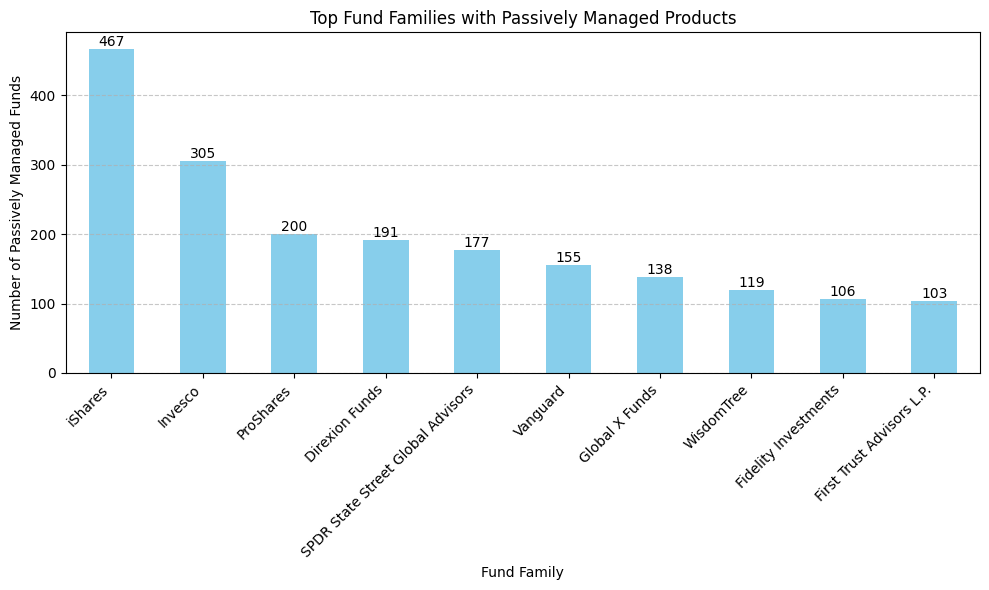

In [10]:
import matplotlib.pyplot as plt

# Plotting the top fund families with passively managed products
plt.figure(figsize=(10, 6))
bar_plot = passive_fund_family_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Fund Families with Passively Managed Products')
plt.xlabel('Fund Family')
plt.ylabel('Number of Passively Managed Funds')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels above each bar
for idx, value in enumerate(passive_fund_family_counts.head(10)):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [46]:
CG_funds = CG[CG['Fund Family'] == 'Capital Group']
print(CG_funds)

         Active/Passive       Investment Type    Fund Family  \
1156   Actively Managed         Open-End Fund  Capital Group   
1157   Actively Managed         Open-End Fund  Capital Group   
1158   Actively Managed         Open-End Fund  Capital Group   
1159   Actively Managed         Open-End Fund  Capital Group   
1160   Actively Managed         Open-End Fund  Capital Group   
1161   Actively Managed         Open-End Fund  Capital Group   
1162   Actively Managed         Open-End Fund  Capital Group   
8844   Actively Managed         Open-End Fund  Capital Group   
13211  Actively Managed  Exchange-Traded Fund  Capital Group   
13212  Actively Managed  Exchange-Traded Fund  Capital Group   
13213  Actively Managed  Exchange-Traded Fund  Capital Group   
13214  Actively Managed  Exchange-Traded Fund  Capital Group   
13215  Actively Managed  Exchange-Traded Fund  Capital Group   
13216  Actively Managed  Exchange-Traded Fund  Capital Group   
13217  Actively Managed  Exchange-Traded

In [48]:
unique_investment_types = CG['Investment Type'].unique()
print(unique_investment_types)

['Exchange-Traded Fund' 'Open-End Fund']


In [50]:
ETF_count = len(CG[CG['Investment Type'] == 'Exchange-Traded Fund'])
print("Number of 'ETF' rows:", ETF_count)

Number of 'ETF' rows: 5113


In [53]:
OEF_count = len(CG[CG['Investment Type'] == 'Open-End Fund'])
print("Number of 'OEF' rows:", OEF_count)

Number of 'OEF' rows: 16538


In [54]:
US_Category_investment_types = CG['US Category Group'].unique()
print(US_Category_investment_types)

['Alternative' 'International Equity' 'Taxable Bond' 'US Equity'
 'Allocation' 'Miscellaneous' 'Municipal Bond' 'Sector Equity'
 'Nontraditional Equity' 'Commodities']


In [59]:
top_fund_families = CG['Fund Family'].value_counts().head(15)
print(top_fund_families)

Fund Family
UnClassified                         1997
Invesco                               663
Fidelity Investments                  543
iShares                               482
Franklin Templeton Investments        383
Columbia Threadneedle                 381
John Hancock                          310
JPMorgan                              295
BlackRock                             281
Vanguard                              256
Direxion Funds                        249
First Trust Advisors L.P.             210
ProShares                             208
Nuveen                                201
SPDR State Street Global Advisors     194
Name: count, dtype: int64


In [ ]:
#'PASSIVELY MANAGED' ANALYSIS

In [141]:
Morningstar_Category_types = CG['Morningstar Category'].unique()
print("Number of unique Morningstar categories:", len(Morningstar_Category_types))


Number of unique Morningstar categories: 136


In [77]:
Morningstar_Category_types = CG['Morningstar Category'].unique()
print(Morningstar_Category_types)

['Equity Market Neutral' 'Foreign Large Blend' 'Foreign Large Growth'
 'Intermediate Core Bond' 'Large Blend' 'Large Value'
 'Moderate Allocation' 'Trading--Inverse Equity' 'Single Currency'
 'Small Value' 'Large Growth' 'Muni National Interm'
 'Trading--Inverse Commodities' 'Trading--Leveraged Commodities'
 'Trading--Leveraged Equity' 'Trading--Miscellaneous'
 'Energy Limited Partnership' 'Ultrashort Bond' 'Long-Short Equity'
 'Real Estate' 'Trading--Inverse Debt' 'Volatility' 'Global Bond'
 'Intermediate Core-Plus Bond' 'Long-Term Bond' 'Muni National Short'
 'High Yield Bond' 'Short Government' 'Global Allocation'
 'Global Large-Stock Blend' 'Pacific/Asia ex-Japan Stk'
 'Miscellaneous Sector' 'Emerging Markets Bond'
 'Emerging-Markets Local-Currency Bond' 'Foreign Large Value'
 'Mid-Cap Value' 'Multicurrency' 'Systematic Trend'
 'Diversified Emerging Mkts' 'Market Neutral' 'Europe Stock'
 'Small Growth' 'Tactical Allocation' 'Mid-Cap Blend' 'Financial'
 'Muni Single State Interm' 'C

Distribution of Passively Managed Funds Across Categories:
Morningstar Category
Large Blend                             401
Trading--Leveraged Equity               229
Large Value                             161
Trading--Inverse Equity                 153
Technology                              141
Foreign Large Blend                     140
Large Growth                            139
Diversified Emerging Mkts               136
Mid-Cap Blend                           128
Miscellaneous Region                    121
Small Blend                             118
Commodities Focused                     103
Health                                   86
High Yield Bond                          81
Natural Resources                        78
Europe Stock                             78
China Region                             64
Foreign Large Value                      63
Mid-Cap Value                            58
Financial                                57
Real Estate                             

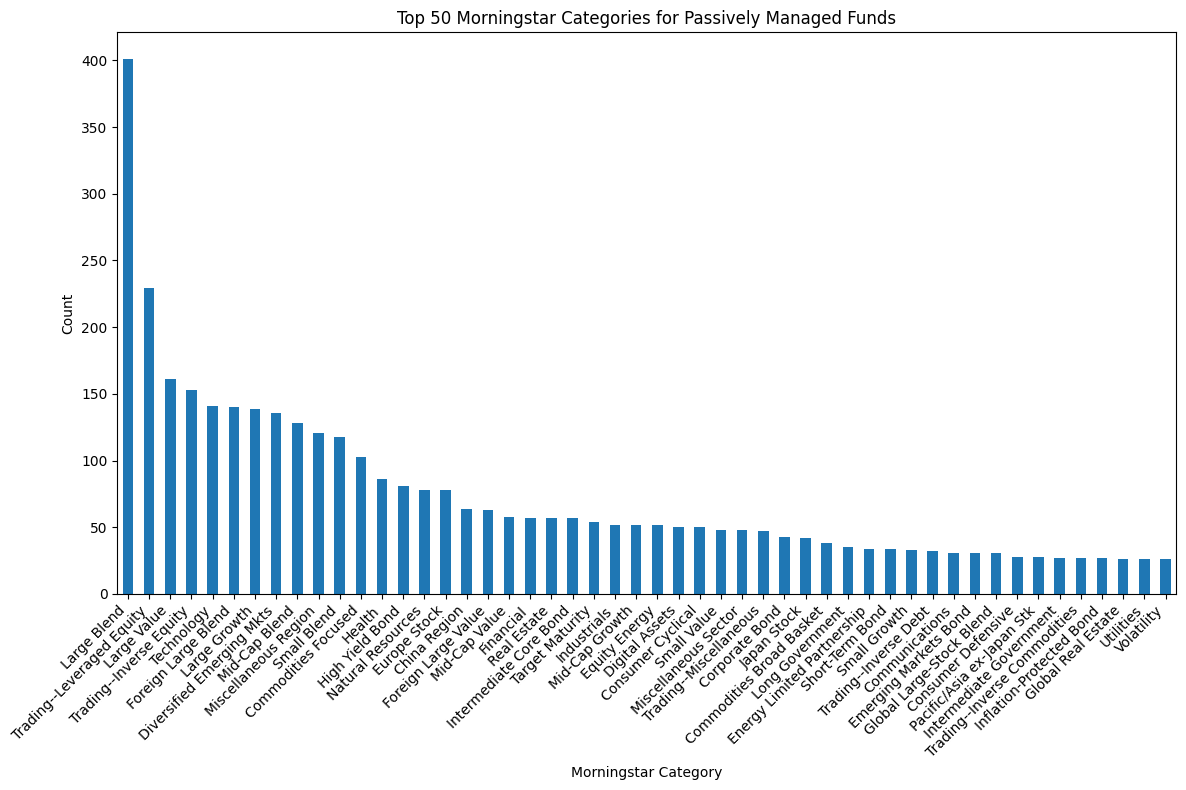

In [78]:
#Distribution Across Categories:

passive_categories = CG[CG['Active/Passive'] == 'Passively Managed']['Morningstar Category'].value_counts()
print("Distribution of Passively Managed Funds Across Categories:")
print(passive_categories)

top_categories = passive_categories.head(50)  # Adjust the number as needed
top_categories.plot(kind='bar', figsize=(12, 8), title='Top 50 Morningstar Categories for Passively Managed Funds')
plt.xlabel('Morningstar Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [140]:
# Filter passively managed funds
passive_funds = CG[CG['Active/Passive'] == 'Passively Managed']

# Calculate the growth rate for each category
passive_funds['Total Net Assets Growth Rate'] = (passive_funds['Total Net Assets 2023-12'] - passive_funds['Total Net Assets 2012-12']) / passive_funds['Total Net Assets 2012-12']
passive_funds['Estimated Net Flow Growth Rate'] = (passive_funds['Estimated Net Flow 2023'] - passive_funds['Estimated Net Flow 2012']) / passive_funds['Estimated Net Flow 2012']

# Group by Morningstar category and calculate average growth rate for total net assets and estimated net flow
category_growth = passive_funds.groupby('Morningstar Category').agg({
    'Total Net Assets Growth Rate': 'mean',
    'Estimated Net Flow Growth Rate': 'mean'
})

# Identify the category with the highest average growth rate
best_performing_category = category_growth.sort_values(by=['Total Net Assets Growth Rate', 'Estimated Net Flow Growth Rate'], ascending=False).head(1)

print("Best performing Morningstar category for Passively Managed funds:")
print(best_performing_category)


Best performing Morningstar category for Passively Managed funds:
                      Total Net Assets Growth Rate  \
Morningstar Category                                 
Short Government                        255.518141   

                      Estimated Net Flow Growth Rate  
Morningstar Category                                  
Short Government                           -63.67465  


/var/folders/m_/hk1ymwn50qb5prsbrm2pp4y80000gn/T/ipykernel_8162/730349192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passive_funds['Total Net Assets Growth Rate'] = (passive_funds['Total Net Assets 2023-12'] - passive_funds['Total Net Assets 2012-12']) / passive_funds['Total Net Assets 2012-12']
/var/folders/m_/hk1ymwn50qb5prsbrm2pp4y80000gn/T/ipykernel_8162/730349192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passive_funds['Estimated Net Flow Growth Rate'] = (passive_funds['Estimated Net 

In [139]:
# Filter passively managed funds and remove rows with zero total net assets and estimated net flow
passive_funds_filtered = passive_funds[(passive_funds.filter(like='Total Net Assets').sum(axis=1) > 0) & 
                                       (passive_funds.filter(like='Estimated Net Flow').sum(axis=1) > 0)]

# Group by Morningstar category and calculate total net assets and estimated net flow
category_summary = passive_funds_filtered.groupby('Morningstar Category').agg({
    'Total Net Assets 2012-12': 'sum', 'Total Net Assets 2013-12': 'sum',
    'Total Net Assets 2014-12': 'sum', 'Total Net Assets 2015-12': 'sum',
    'Total Net Assets 2016-12': 'sum', 'Total Net Assets 2017-12': 'sum',
    'Total Net Assets 2018-12': 'sum', 'Total Net Assets 2019-12': 'sum',
    'Total Net Assets 2020-12': 'sum', 'Total Net Assets 2021-12': 'sum',
    'Total Net Assets 2022-12': 'sum', 'Total Net Assets 2023-12': 'sum',
    'Estimated Net Flow 2012': 'sum', 'Estimated Net Flow 2013': 'sum',
    'Estimated Net Flow 2014': 'sum', 'Estimated Net Flow 2015': 'sum',
    'Estimated Net Flow 2016': 'sum', 'Estimated Net Flow 2017': 'sum',
    'Estimated Net Flow 2018': 'sum', 'Estimated Net Flow 2019': 'sum',
    'Estimated Net Flow 2020': 'sum', 'Estimated Net Flow 2021': 'sum',
    'Estimated Net Flow 2022': 'sum', 'Estimated Net Flow 2023': 'sum'
})

# Sort categories by total net assets and estimated net flow
category_summary = category_summary.sort_values(by=['Total Net Assets 2023-12', 'Estimated Net Flow 2023'], ascending=False)

print(category_summary)


                                      Total Net Assets 2012-12  \
Morningstar Category                                             
Large Blend                                       6.210668e+11   
Foreign Large Blend                               1.463057e+11   
Intermediate Core Bond                            2.405681e+11   
Large Growth                                      6.961582e+10   
Large Value                                       7.122497e+10   
Mid-Cap Blend                                     5.714225e+10   
Small Blend                                       5.810443e+10   
Diversified Emerging Mkts                         8.819969e+10   
Technology                                        1.456611e+10   
Global Bond-USD Hedged                            0.000000e+00   
Intermediate Government                           1.343623e+10   
Long Government                                   1.035543e+10   
Short-Term Bond                                   4.326493e+10   
Inflation-

In [144]:
#Digital Asset Analysis

# Assuming CG is your DataFrame containing the dataset

# Filter the data for the 'Digital Assets' Morningstar category and only passively managed funds
digital_assets_passive = CG[(CG['Morningstar Category'] == 'Digital Assets') & (CG['Active/Passive'] == 'Passively Managed')]

# Display the filtered DataFrame
print(digital_assets_passive)


          Active/Passive       Investment Type  \
8608   Passively Managed  Exchange-Traded Fund   
10836  Passively Managed  Exchange-Traded Fund   
10902  Passively Managed  Exchange-Traded Fund   
10903  Passively Managed  Exchange-Traded Fund   
11446  Passively Managed  Exchange-Traded Fund   
11476  Passively Managed  Exchange-Traded Fund   
11477  Passively Managed  Exchange-Traded Fund   
11478  Passively Managed  Exchange-Traded Fund   
11552  Passively Managed  Exchange-Traded Fund   
12417  Passively Managed  Exchange-Traded Fund   
12418  Passively Managed  Exchange-Traded Fund   
12419  Passively Managed  Exchange-Traded Fund   
12982  Passively Managed  Exchange-Traded Fund   
12993  Passively Managed  Exchange-Traded Fund   
13018  Passively Managed  Exchange-Traded Fund   
13034  Passively Managed  Exchange-Traded Fund   
13047  Passively Managed  Exchange-Traded Fund   
13048  Passively Managed  Exchange-Traded Fund   
13049  Passively Managed  Exchange-Traded Fund   


In [145]:
#Consumer Cyclical Passive Analysis

# Assuming CG is your DataFrame containing the dataset

# Filter the data for the 'Consumer Cyclical' Morningstar category and only passively managed funds
consumer_cyclical_passive = CG[(CG['Morningstar Category'] == 'Consumer Cyclical') & (CG['Active/Passive'] == 'Passively Managed')]

# Display the filtered DataFrame
print(consumer_cyclical_passive)


          Active/Passive       Investment Type  \
6480   Passively Managed  Exchange-Traded Fund   
6481   Passively Managed  Exchange-Traded Fund   
6551   Passively Managed  Exchange-Traded Fund   
6664   Passively Managed  Exchange-Traded Fund   
6665   Passively Managed  Exchange-Traded Fund   
6666   Passively Managed  Exchange-Traded Fund   
6667   Passively Managed  Exchange-Traded Fund   
6668   Passively Managed  Exchange-Traded Fund   
7092   Passively Managed  Exchange-Traded Fund   
7093   Passively Managed  Exchange-Traded Fund   
7094   Passively Managed  Exchange-Traded Fund   
7095   Passively Managed  Exchange-Traded Fund   
7281   Passively Managed  Exchange-Traded Fund   
7282   Passively Managed  Exchange-Traded Fund   
7324   Passively Managed  Exchange-Traded Fund   
7437   Passively Managed  Exchange-Traded Fund   
7438   Passively Managed  Exchange-Traded Fund   
7439   Passively Managed  Exchange-Traded Fund   
7440   Passively Managed  Exchange-Traded Fund   


Summary Statistics of Total Net Assets for Passively Managed Funds:
count    2.516000e+03
mean     5.279304e+09
std      3.504595e+10
min      2.500000e+01
25%      3.249181e+07
50%      2.412915e+08
75%      1.440302e+09
max      1.110588e+12
Name: Total Net Assets 2023-12, dtype: float64


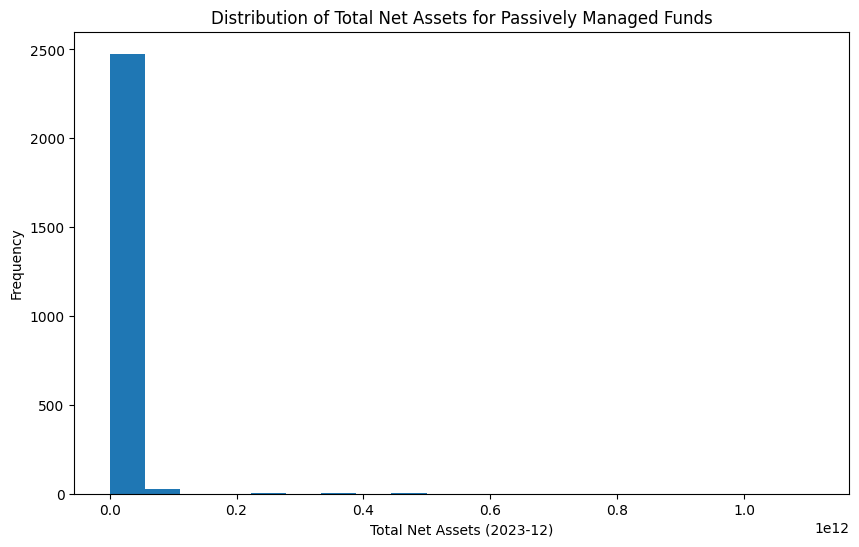

In [79]:
#Net Asset Analysis 2023

# Remove commas from 'Total Net Assets 2023-12' column and convert to float
CG['Total Net Assets 2023-12'] = CG['Total Net Assets 2023-12'].str.replace(',', '').astype(float)

# Now, you can calculate summary statistics
passive_net_assets_summary = CG[CG['Active/Passive'] == 'Passively Managed']['Total Net Assets 2023-12'].describe()
print("Summary Statistics of Total Net Assets for Passively Managed Funds:")
print(passive_net_assets_summary)

# Visualize net assets distribution using a histogram or box plot
CG[CG['Active/Passive'] == 'Passively Managed']['Total Net Assets 2023-12'].plot(kind='hist', bins=20, figsize=(10, 6), title='Distribution of Total Net Assets for Passively Managed Funds')
plt.xlabel('Total Net Assets (2023-12)')
plt.ylabel('Frequency')
plt.show()

Summary Statistics of Total Net Assets for Passively Managed Funds:
count    2.506000e+03
mean     4.319044e+09
std      2.768591e+10
min      3.093600e+04
25%      2.746312e+07
50%      2.012510e+08
75%      1.252568e+09
max      8.918433e+11
Name: Total Net Assets 2022-12, dtype: float64


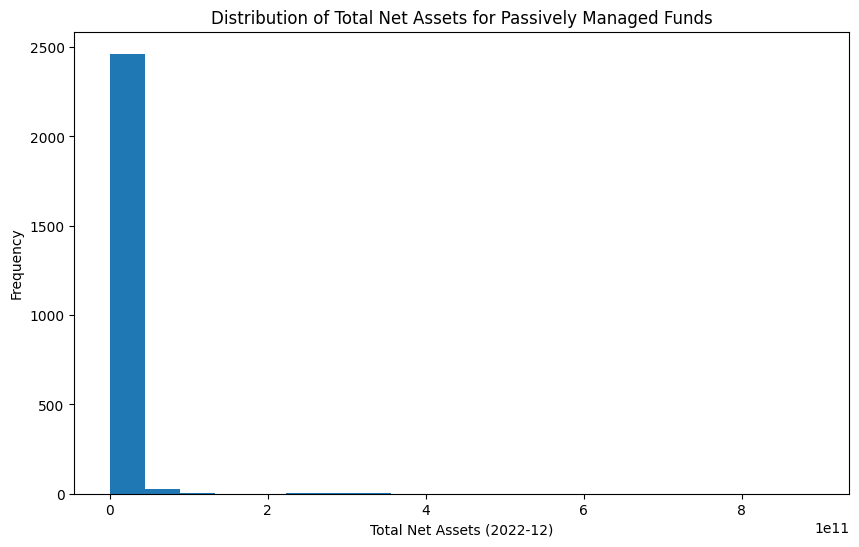

In [80]:
#Net Asset Analysis 2022

# Remove commas from 'Total Net Assets 2022-12' column and convert to float
CG['Total Net Assets 2022-12'] = CG['Total Net Assets 2022-12'].str.replace(',', '').astype(float)

# Now, you can calculate summary statistics
passive_net_assets_summary = CG[CG['Active/Passive'] == 'Passively Managed']['Total Net Assets 2022-12'].describe()
print("Summary Statistics of Total Net Assets for Passively Managed Funds:")
print(passive_net_assets_summary)

# Visualize net assets distribution using a histogram or box plot
CG[CG['Active/Passive'] == 'Passively Managed']['Total Net Assets 2022-12'].plot(kind='hist', bins=20, figsize=(10, 6), title='Distribution of Total Net Assets for Passively Managed Funds')
plt.xlabel('Total Net Assets (2022-12)')
plt.ylabel('Frequency')
plt.show()


Summary Statistics of Total Net Assets for Passively Managed Funds in 2022:
count    2.506000e+03
mean     4.319044e+09
std      2.768591e+10
min      3.093600e+04
25%      2.746312e+07
50%      2.012510e+08
75%      1.252568e+09
max      8.918433e+11
Name: Total Net Assets 2022-12, dtype: float64


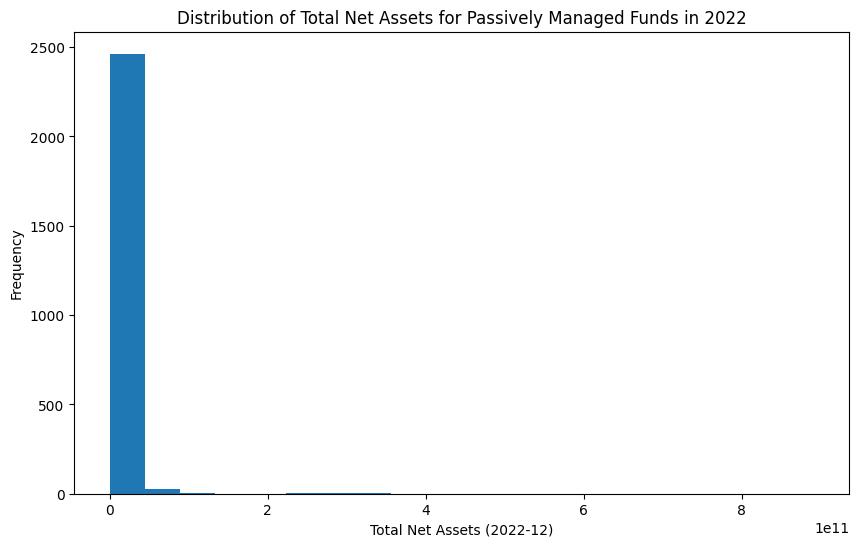


Summary Statistics of Total Net Assets for Passively Managed Funds in 2021:
count    2.457000e+03
mean     5.103456e+09
std      3.342185e+10
min      6.581400e+04
25%      3.375304e+07
50%      2.387028e+08
75%      1.399898e+09
max      1.074325e+12
Name: Total Net Assets 2021-12, dtype: float64


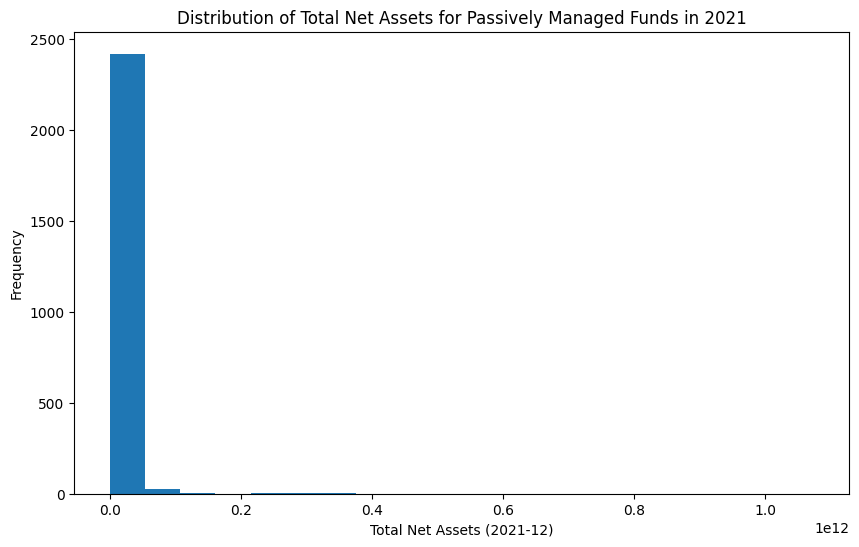


Summary Statistics of Total Net Assets for Passively Managed Funds in 2020:
count    2.333000e+03
mean     4.263605e+09
std      2.774717e+10
min      2.500000e+01
25%      2.930263e+07
50%      1.849548e+08
75%      1.212485e+09
max      8.786364e+11
Name: Total Net Assets 2020-12, dtype: float64


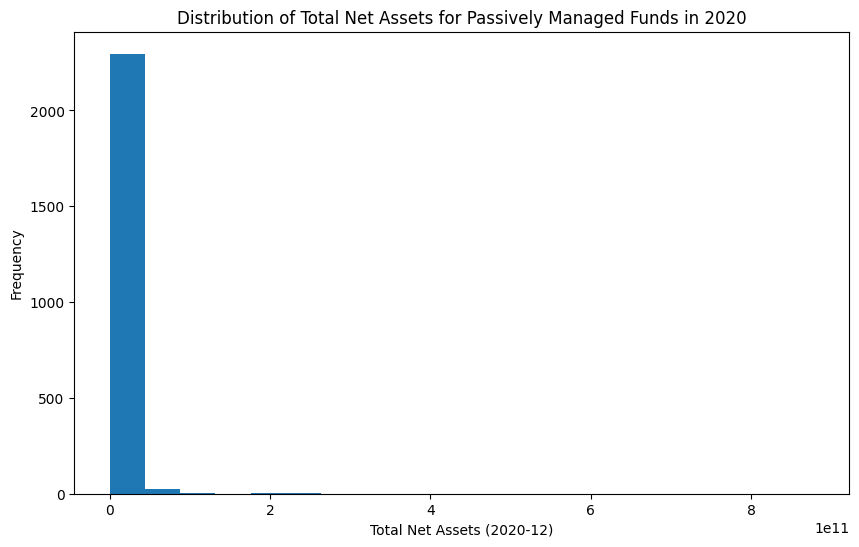


Summary Statistics of Total Net Assets for Passively Managed Funds in 2019:
count    2.443000e+03
mean     3.448822e+09
std      2.383809e+10
min      1.000000e+02
25%      1.947964e+07
50%      1.205771e+08
75%      9.395702e+08
max      7.595487e+11
Name: Total Net Assets 2019-12, dtype: float64


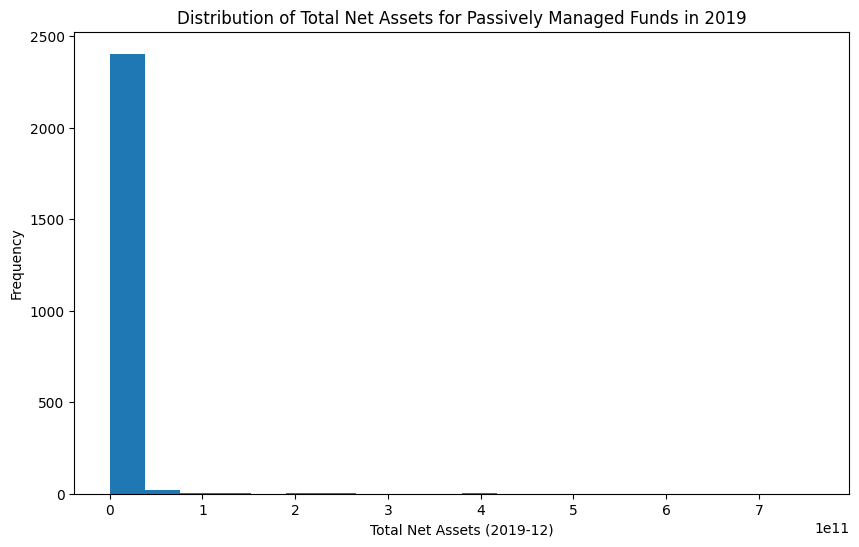


Summary Statistics of Total Net Assets for Passively Managed Funds in 2018:
count    2.379000e+03
mean     2.724865e+09
std      1.857509e+10
min      1.722030e+05
25%      1.741446e+07
50%      1.038160e+08
75%      7.575222e+08
max      5.773862e+11
Name: Total Net Assets 2018-12, dtype: float64


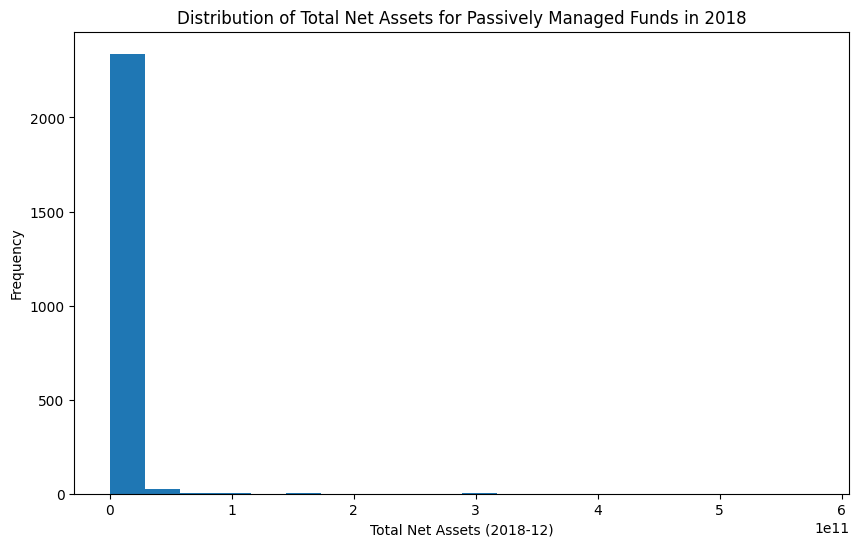


Summary Statistics of Total Net Assets for Passively Managed Funds in 2017:
count    2.262000e+03
mean     2.905496e+09
std      1.926751e+10
min      9.803000e+03
25%      1.730207e+07
50%      1.185688e+08
75%      8.395595e+08
max      5.707151e+11
Name: Total Net Assets 2017-12, dtype: float64


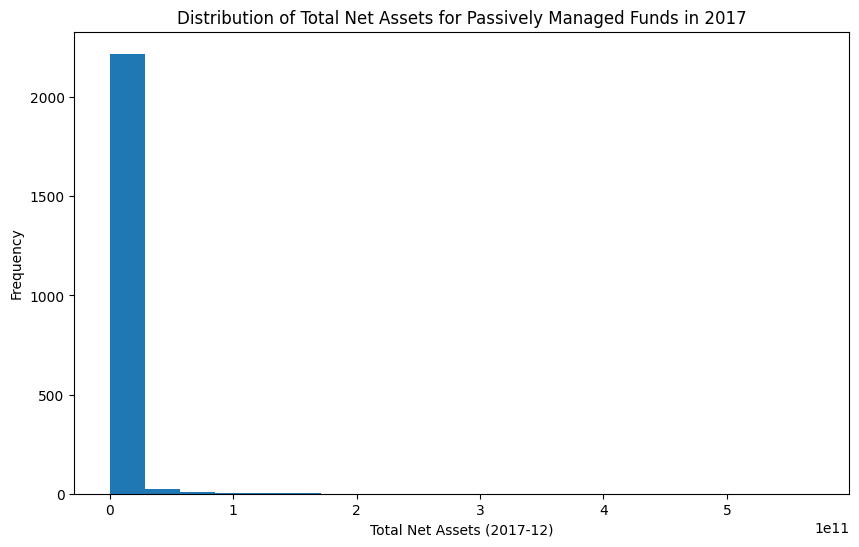


Summary Statistics of Total Net Assets for Passively Managed Funds in 2016:
count    2.149000e+03
mean     2.327377e+09
std      1.508379e+10
min      1.034800e+04
25%      1.462404e+07
50%      1.040213e+08
75%      6.733267e+08
max      4.285630e+11
Name: Total Net Assets 2016-12, dtype: float64


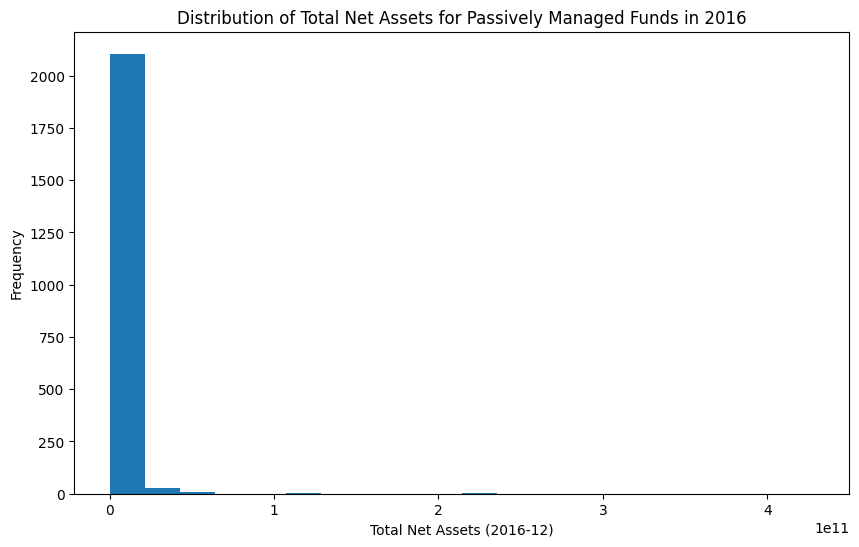


Summary Statistics of Total Net Assets for Passively Managed Funds in 2015:
count    2.067000e+03
mean     2.020755e+09
std      1.262602e+10
min      3.594000e+03
25%      1.465634e+07
50%      9.671363e+07
75%      6.113345e+08
max      3.432172e+11
Name: Total Net Assets 2015-12, dtype: float64


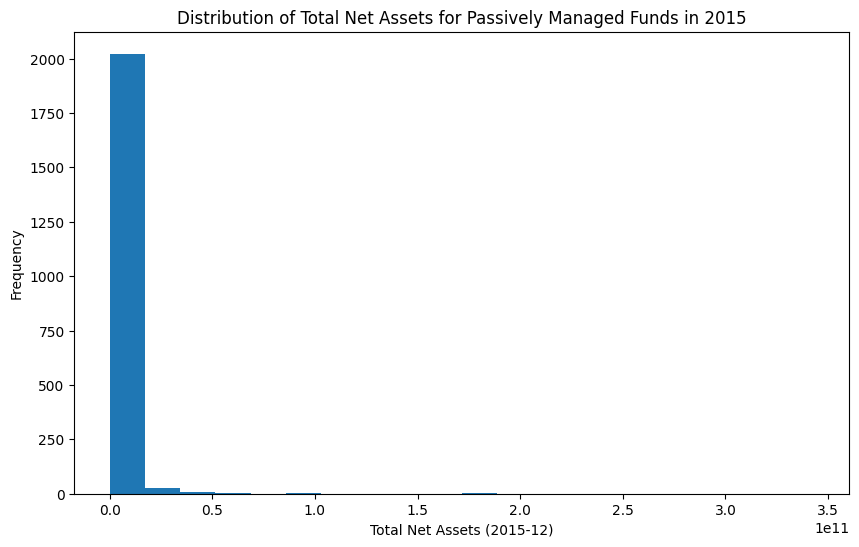


Summary Statistics of Total Net Assets for Passively Managed Funds in 2014:
count    1.907000e+03
mean     2.049472e+09
std      1.262880e+10
min      1.500900e+05
25%      1.922196e+07
50%      1.148983e+08
75%      6.351303e+08
max      3.321167e+11
Name: Total Net Assets 2014-12, dtype: float64


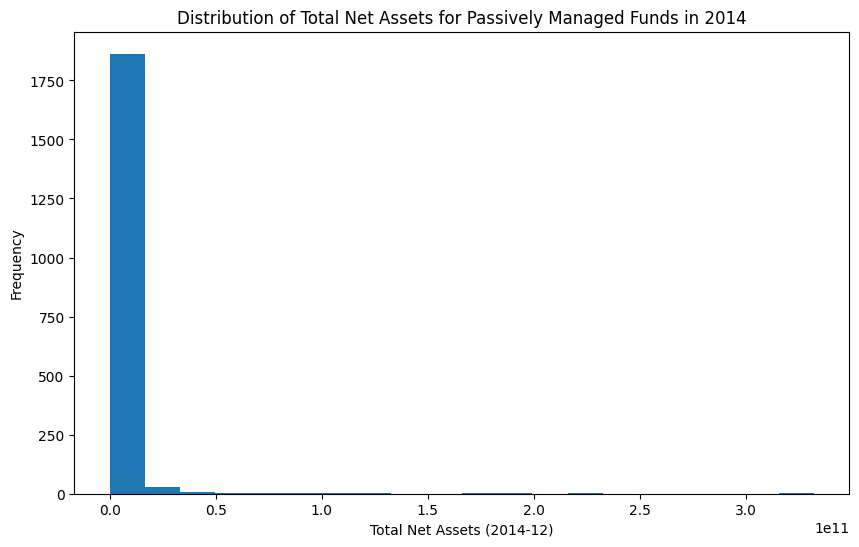


Summary Statistics of Total Net Assets for Passively Managed Funds in 2013:
count    1.819000e+03
mean     1.816149e+09
std      1.073749e+10
min      5.011000e+03
25%      1.898908e+07
50%      1.035502e+08
75%      5.602058e+08
max      2.681672e+11
Name: Total Net Assets 2013-12, dtype: float64


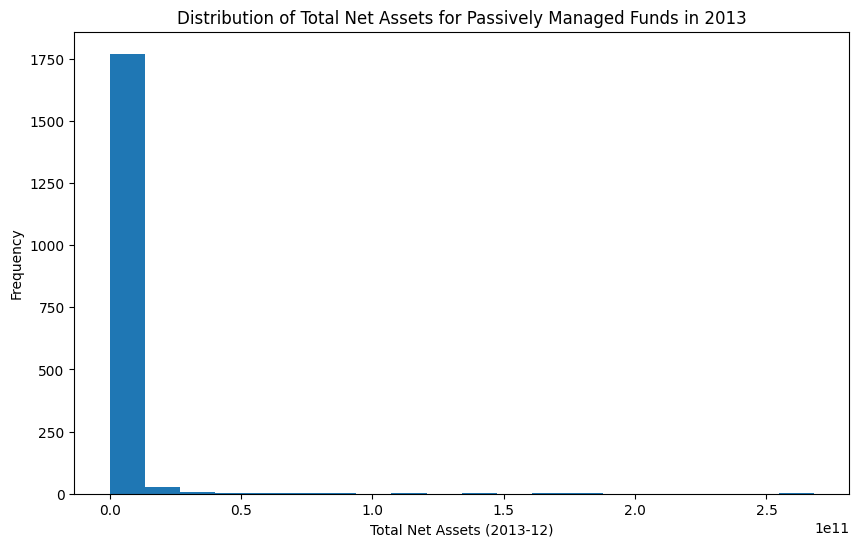


Summary Statistics of Total Net Assets for Passively Managed Funds in 2012:
count    1.721000e+03
mean     1.484134e+09
std      8.438840e+09
min      2.435240e+05
25%      1.355733e+07
50%      7.556611e+07
75%      4.482542e+08
max      1.860992e+11
Name: Total Net Assets 2012-12, dtype: float64


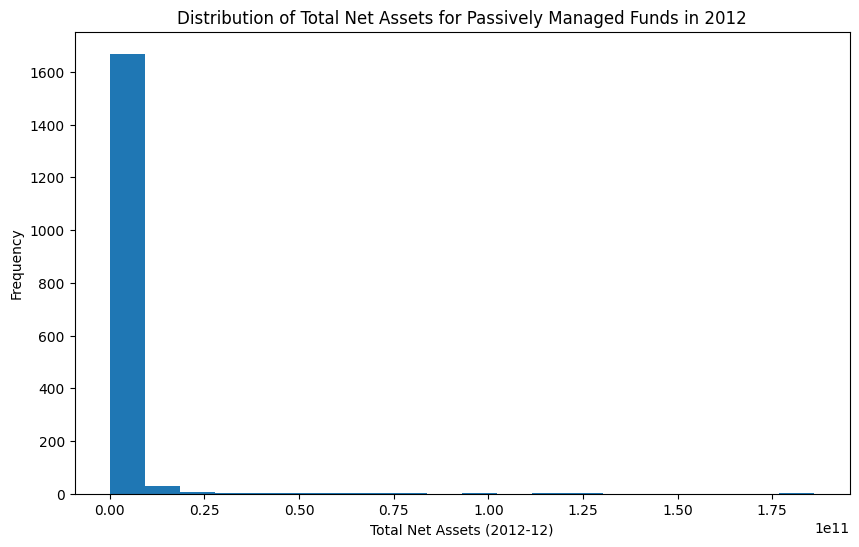

In [82]:
#Total Net Assets Analysis from 2012 to 2022
# Loop through each year from 2022 to 2012
for year in range(2022, 2011, -1):
    # Convert column to float if necessary
    column_name = f'Total Net Assets {year}-12'
    if isinstance(CG[column_name].iloc[0], str):
        CG[column_name] = CG[column_name].str.replace(',', '').astype(float)
    
    # Calculate summary statistics
    passive_net_assets_summary = CG[CG['Active/Passive'] == 'Passively Managed'][column_name].describe()
    print(f"\nSummary Statistics of Total Net Assets for Passively Managed Funds in {year}:")
    print(passive_net_assets_summary)
    
    # Visualize net assets distribution using a histogram
    CG[CG['Active/Passive'] == 'Passively Managed'][column_name].plot(kind='hist', bins=20, figsize=(10, 6), title=f'Distribution of Total Net Assets for Passively Managed Funds in {year}')
    plt.xlabel(f'Total Net Assets ({year}-12)')
    plt.ylabel('Frequency')
    plt.show()


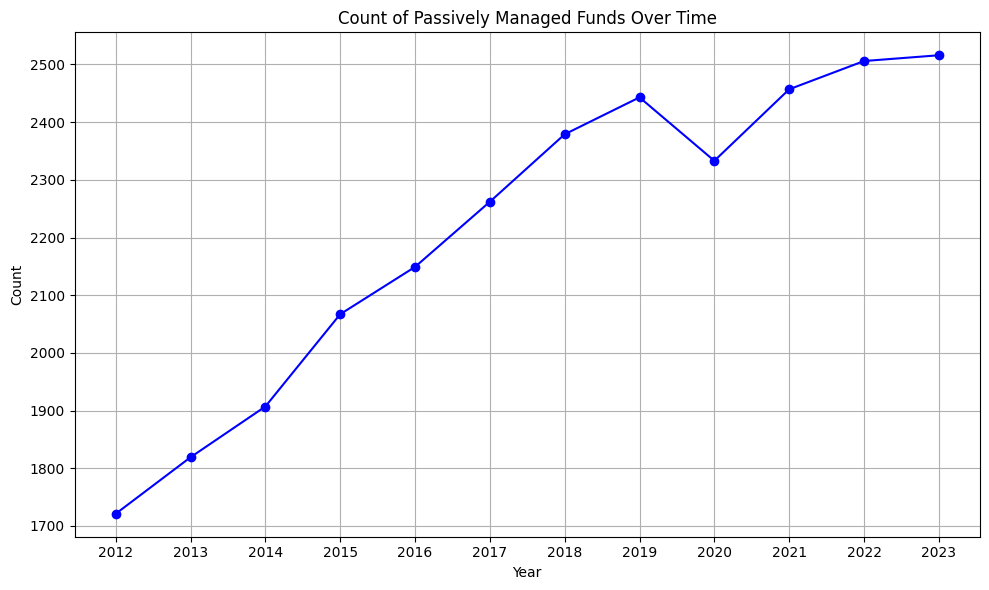

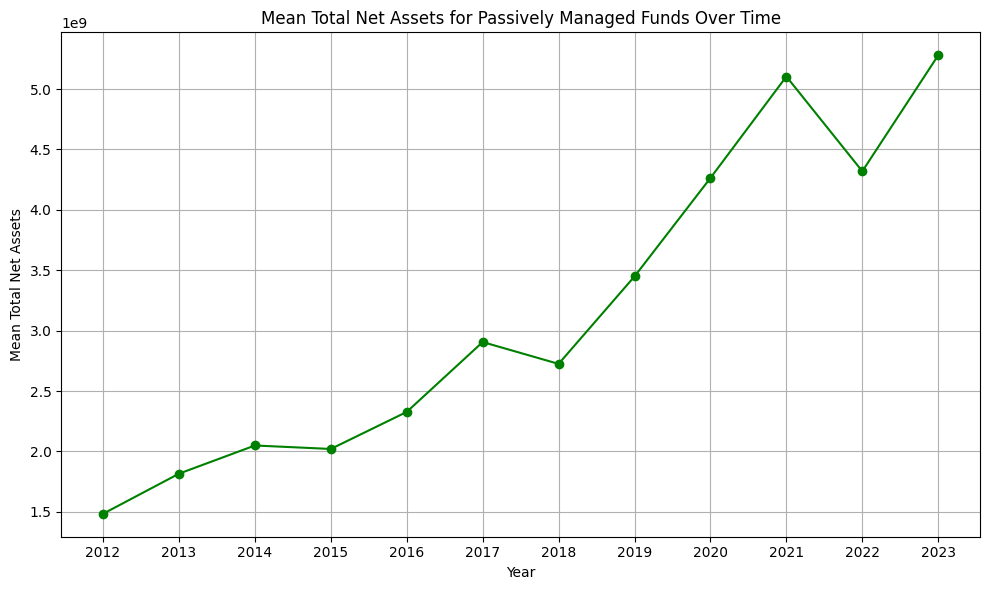

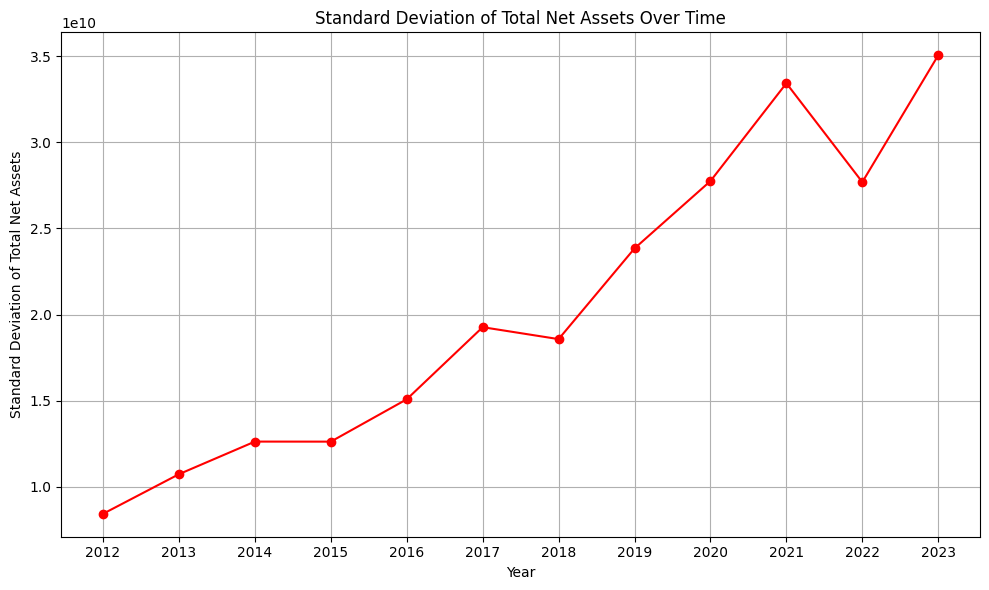

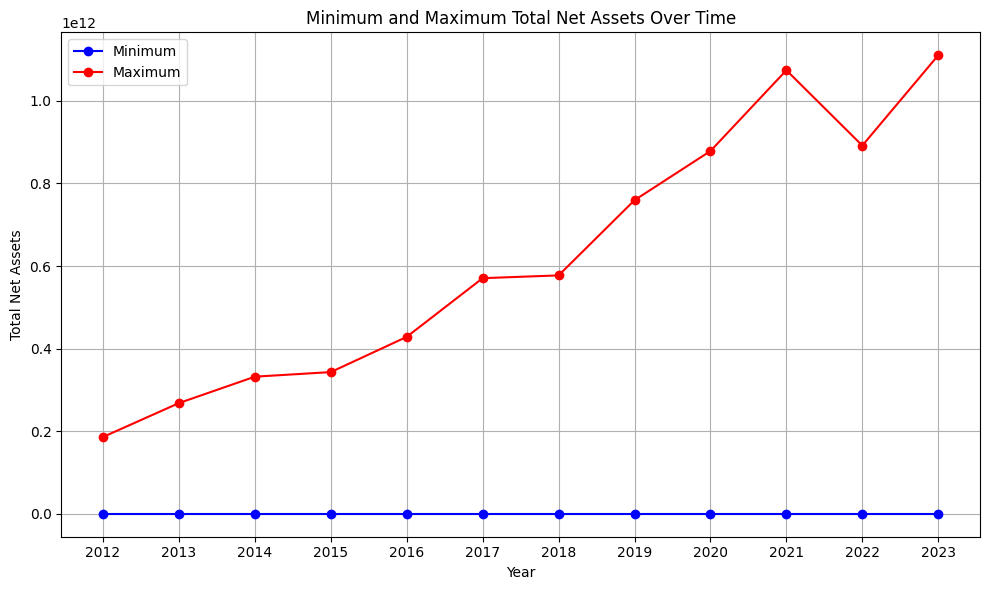

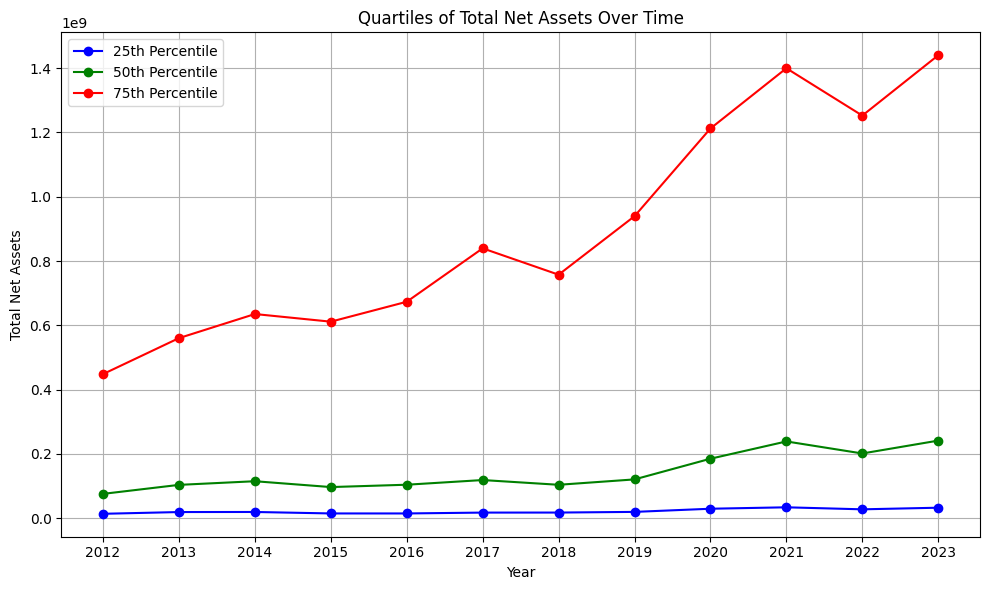

In [93]:
import matplotlib.pyplot as plt

# Summary statistics data
years = list(range(2012, 2024))
count = [1.721000e+03, 1.819000e+03, 1.907000e+03, 2.067000e+03, 2.149000e+03,
         2.262000e+03, 2.379000e+03, 2.443000e+03, 2.333000e+03, 2.457000e+03,
         2.506000e+03, 2.516000e+03]
mean = [1.484134e+09, 1.816149e+09, 2.049472e+09, 2.020755e+09, 2.327377e+09,
        2.905496e+09, 2.724865e+09, 3.448822e+09, 4.263605e+09, 5.103456e+09,
        4.319044e+09, 5.279304e+09]
std_dev = [8.438840e+09, 1.073749e+10, 1.262880e+10, 1.262602e+10, 1.508379e+10,
           1.926751e+10, 1.857509e+10, 2.383809e+10, 2.774717e+10, 3.342185e+10,
           2.768591e+10, 3.504595e+10]
min_assets = [2.435240e+05, 5.011000e+03, 1.500900e+05, 3.594000e+03, 1.034800e+04,
              9.803000e+03, 1.722030e+05, 1.000000e+02, 2.500000e+01, 6.581400e+04,
              3.093600e+04, 2.500000e+01]
max_assets = [1.860992e+11, 2.681672e+11, 3.321167e+11, 3.432172e+11, 4.285630e+11,
              5.707151e+11, 5.773862e+11, 7.595487e+11, 8.786364e+11, 1.074325e+12,
              8.918433e+11, 1.110588e+12]
percentile_25 = [1.355733e+07, 1.898908e+07, 1.922196e+07, 1.465634e+07, 1.462404e+07,
                  1.730207e+07, 1.741446e+07, 1.947964e+07, 2.930263e+07, 3.375304e+07,
                  2.746312e+07, 3.249181e+07]
percentile_50 = [7.556611e+07, 1.035502e+08, 1.148983e+08, 9.671363e+07, 1.040213e+08,
                  1.185688e+08, 1.038160e+08, 1.205771e+08, 1.849548e+08, 2.387028e+08,
                  2.012510e+08, 2.412915e+08]
percentile_75 = [4.482542e+08, 5.602058e+08, 6.351303e+08, 6.113345e+08, 6.733267e+08,
                  8.395595e+08, 7.575222e+08, 9.395702e+08, 1.212485e+09, 1.399898e+09,
                  1.252568e+09, 1.440302e+09]

# Create separate graphs for each statistic

# Count of assets
plt.figure(figsize=(10, 6))
plt.plot(years, count, marker='o', linestyle='-', color='b')
plt.title('Count of Passively Managed Funds Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(years)  # Ensure all years are displayed on the x-axis
plt.tight_layout()
plt.show()

# Mean assets
plt.figure(figsize=(10, 6))
plt.plot(years, mean, marker='o', linestyle='-', color='g')
plt.title('Mean Total Net Assets for Passively Managed Funds Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Total Net Assets')
plt.grid(True)
plt.xticks(years)  # Ensure all years are displayed on the x-axis
plt.tight_layout()
plt.show()

# Standard deviation of total net assets
plt.figure(figsize=(10, 6))
plt.plot(years, std_dev, marker='o', linestyle='-', color='r')
plt.title('Standard Deviation of Total Net Assets Over Time')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Total Net Assets')
plt.grid(True)
plt.xticks(years)  # Ensure all years are displayed on the x-axis
plt.tight_layout()
plt.show()

# Minimum and maximum total net assets
plt.figure(figsize=(10, 6))
plt.plot(years, min_assets, marker='o', linestyle='-', color='b', label='Minimum')
plt.plot(years, max_assets, marker='o', linestyle='-', color='r', label='Maximum')
plt.title('Minimum and Maximum Total Net Assets Over Time')
plt.xlabel('Year')
plt.ylabel('Total Net Assets')
plt.legend()
plt.grid(True)
plt.xticks(years)  # Ensure all years are displayed on the x-axis
plt.tight_layout()
plt.show()

# Quartiles of total net assets over time
plt.figure(figsize=(10, 6))
plt.plot(years, percentile_25, marker='o', linestyle='-', color='b', label='25th Percentile')
plt.plot(years, percentile_50, marker='o', linestyle='-', color='g', label='50th Percentile')
plt.plot(years, percentile_75, marker='o', linestyle='-', color='r', label='75th Percentile')
plt.title('Quartiles of Total Net Assets Over Time')
plt.xlabel('Year')
plt.ylabel('Total Net Assets')
plt.legend()
plt.grid(True)
plt.xticks(years)  # Ensure all years are displayed on the x-axis
plt.tight_layout()
plt.show()


In [94]:
# Summary statistics data
years = list(range(2012, 2024))
count = [1.721000e+03, 1.819000e+03, 1.907000e+03, 2.067000e+03, 2.149000e+03,
         2.262000e+03, 2.379000e+03, 2.443000e+03, 2.333000e+03, 2.457000e+03,
         2.506000e+03, 2.516000e+03]
mean = [1.484134e+09, 1.816149e+09, 2.049472e+09, 2.020755e+09, 2.327377e+09,
        2.905496e+09, 2.724865e+09, 3.448822e+09, 4.263605e+09, 5.103456e+09,
        4.319044e+09, 5.279304e+09]
std_dev = [8.438840e+09, 1.073749e+10, 1.262880e+10, 1.262602e+10, 1.508379e+10,
           1.926751e+10, 1.857509e+10, 2.383809e+10, 2.774717e+10, 3.342185e+10,
           2.768591e+10, 3.504595e+10]
min_assets = [2.435240e+05, 5.011000e+03, 1.500900e+05, 3.594000e+03, 1.034800e+04,
              9.803000e+03, 1.722030e+05, 1.000000e+02, 2.500000e+01, 6.581400e+04,
              3.093600e+04, 2.500000e+01]
max_assets = [1.860992e+11, 2.681672e+11, 3.321167e+11, 3.432172e+11, 4.285630e+11,
              5.707151e+11, 5.773862e+11, 7.595487e+11, 8.786364e+11, 1.074325e+12,
              8.918433e+11, 1.110588e+12]
percentile_25 = [1.355733e+07, 1.898908e+07, 1.922196e+07, 1.465634e+07, 1.462404e+07,
                  1.730207e+07, 1.741446e+07, 1.947964e+07, 2.930263e+07, 3.375304e+07,
                  2.746312e+07, 3.249181e+07]
percentile_50 = [7.556611e+07, 1.035502e+08, 1.148983e+08, 9.671363e+07, 1.040213e+08,
                  1.185688e+08, 1.038160e+08, 1.205771e+08, 1.849548e+08, 2.387028e+08,
                  2.012510e+08, 2.412915e+08]
percentile_75 = [4.482542e+08, 5.602058e+08, 6.351303e+08, 6.113345e+08, 6.733267e+08,
                  8.395595e+08, 7.575222e+08, 9.395702e+08, 1.212485e+09, 1.399898e+09,
                  1.252568e+09, 1.440302e+09]

# Print out summary statistics
print("Summary Statistics of Total Net Assets for Passively Managed Funds")
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Year", "Count", "Mean", "Std Dev", "Min", "Max", "25th", "50th", "75th"))
for i in range(len(years)):
    print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(years[i], count[i], mean[i], std_dev[i], min_assets[i], max_assets[i], percentile_25[i], percentile_50[i], percentile_75[i]))


Summary Statistics of Total Net Assets for Passively Managed Funds
Year       Count      Mean       Std Dev    Min        Max        25th       50th       75th      
2012       1721.0     1484134000.0 8438840000.0 243524.0   186099200000.0 13557330.0 75566110.0 448254200.0
2013       1819.0     1816149000.0 10737490000.0 5011.0     268167200000.0 18989080.0 103550200.0 560205800.0
2014       1907.0     2049472000.0 12628800000.0 150090.0   332116700000.0 19221960.0 114898300.0 635130300.0
2015       2067.0     2020755000.0 12626020000.0 3594.0     343217200000.0 14656340.0 96713630.0 611334500.0
2016       2149.0     2327377000.0 15083790000.0 10348.0    428563000000.0 14624040.0 104021300.0 673326700.0
2017       2262.0     2905496000.0 19267510000.0 9803.0     570715100000.0 17302070.0 118568800.0 839559500.0
2018       2379.0     2724865000.0 18575090000.0 172203.0   577386200000.0 17414460.0 103816000.0 757522200.0
2019       2443.0     3448822000.0 23838090000.0 100.0      7595487

Summary Statistics of Estimated Net Flows for Passively Managed Funds:
count    2.658000e+03
mean     1.981824e+08
std      2.134241e+09
min     -1.692696e+10
25%     -2.763891e+07
50%      0.000000e+00
75%      4.270967e+07
max      5.091990e+10
Name: Estimated Net Flow 2023, dtype: float64


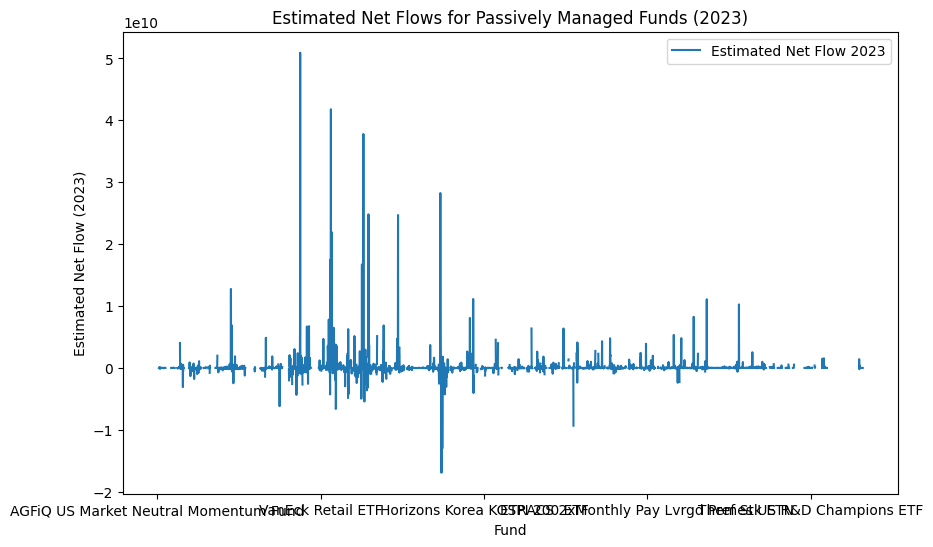

In [96]:
#Estimated Net Flows Analysis 2023:
# Remove commas and parentheses from 'Estimated Net Flow 2023' column and convert to float
CG['Estimated Net Flow 2023'] = CG['Estimated Net Flow 2023'].str.replace(',', '').str.replace('(', '-').str.replace(')', '').astype(float)

# Now, you can calculate summary statistics
passive_net_flows_summary = CG[CG['Active/Passive'] == 'Passively Managed']['Estimated Net Flow 2023'].describe()
print("Summary Statistics of Estimated Net Flows for Passively Managed Funds:")
print(passive_net_flows_summary)

# Visualize net flows trends over time using a line plot or bar plot
CG[CG['Active/Passive'] == 'Passively Managed'].plot(x='Fund', y='Estimated Net Flow 2023', kind='line', figsize=(10, 6), title='Estimated Net Flows for Passively Managed Funds (2023)')
plt.xlabel('Fund')
plt.ylabel('Estimated Net Flow (2023)')
plt.show()


Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2023:
count    2.658000e+03
mean     1.981824e+08
std      2.134241e+09
min     -1.692696e+10
25%     -2.763891e+07
50%      0.000000e+00
75%      4.270967e+07
max      5.091990e+10
Name: Estimated Net Flow 2023, dtype: float64


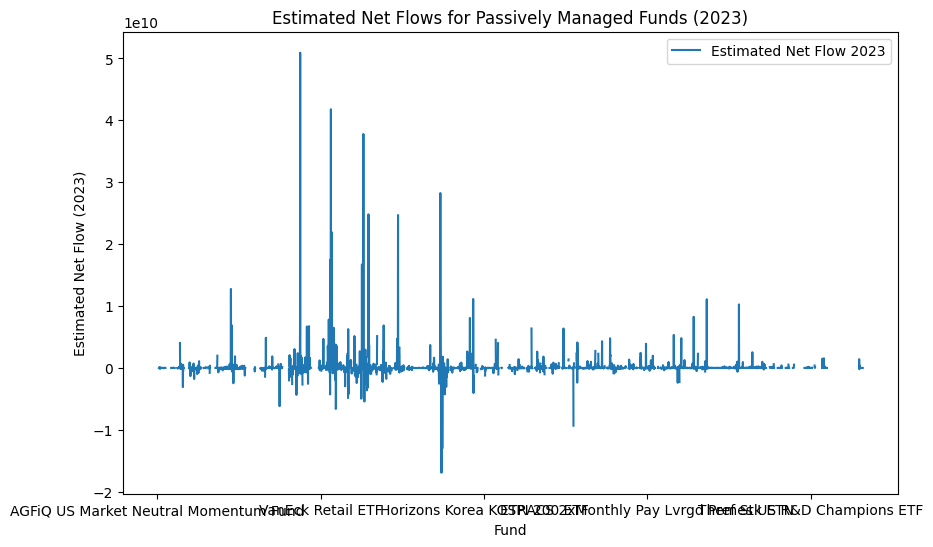

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2022:
count    2.616000e+03
mean     2.153851e+08
std      2.118788e+09
min     -3.127956e+10
25%     -1.782255e+07
50%      8.607630e+05
75%      6.562583e+07
max      3.968627e+10
Name: Estimated Net Flow 2022, dtype: float64


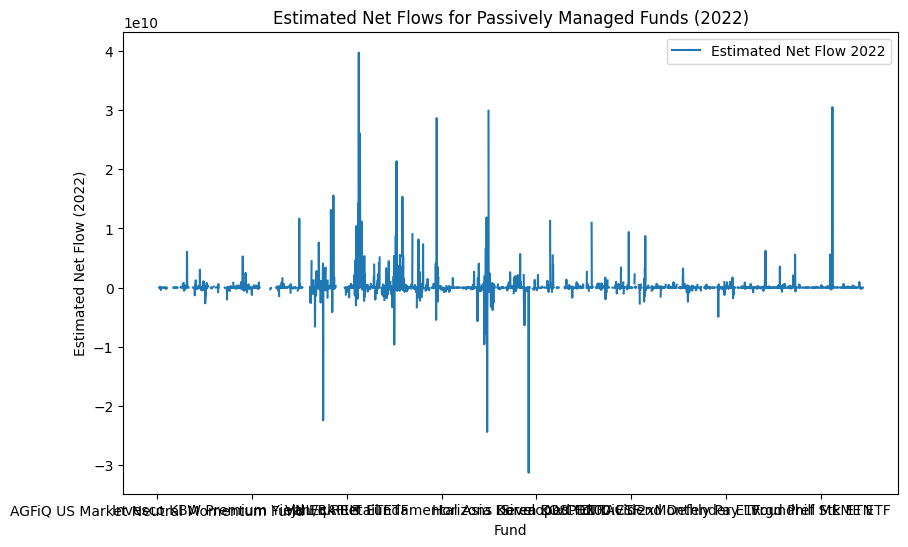

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2021:
count    2.518000e+03
mean     3.842370e+08
std      3.094358e+09
min     -5.096865e+10
25%     -4.245633e+06
50%      1.021335e+07
75%      1.489078e+08
max      7.216247e+10
Name: Estimated Net Flow 2021, dtype: float64


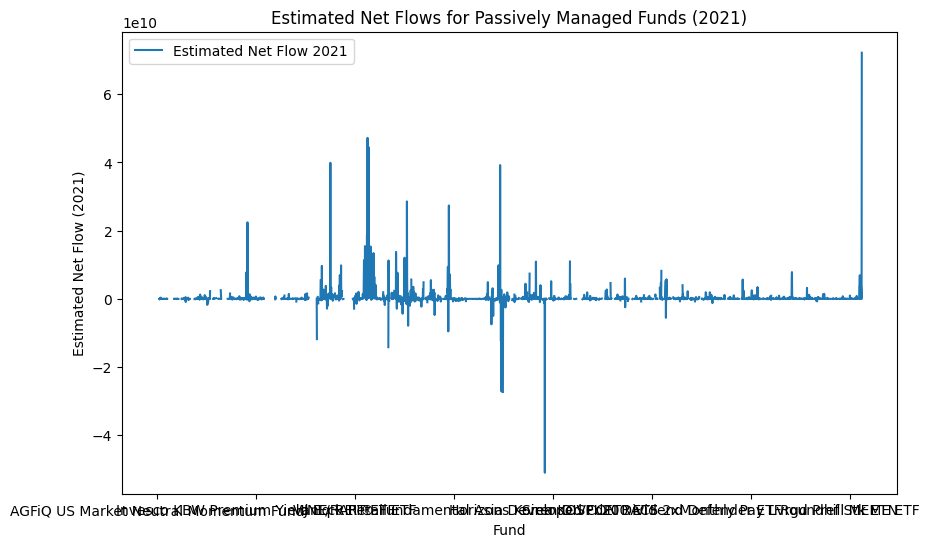

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2020:
count    2.590000e+03
mean     1.579581e+08
std      1.864547e+09
min     -3.640018e+10
25%     -1.447773e+07
50%      6.595660e+05
75%      6.759712e+07
max      3.291860e+10
Name: Estimated Net Flow 2020, dtype: float64


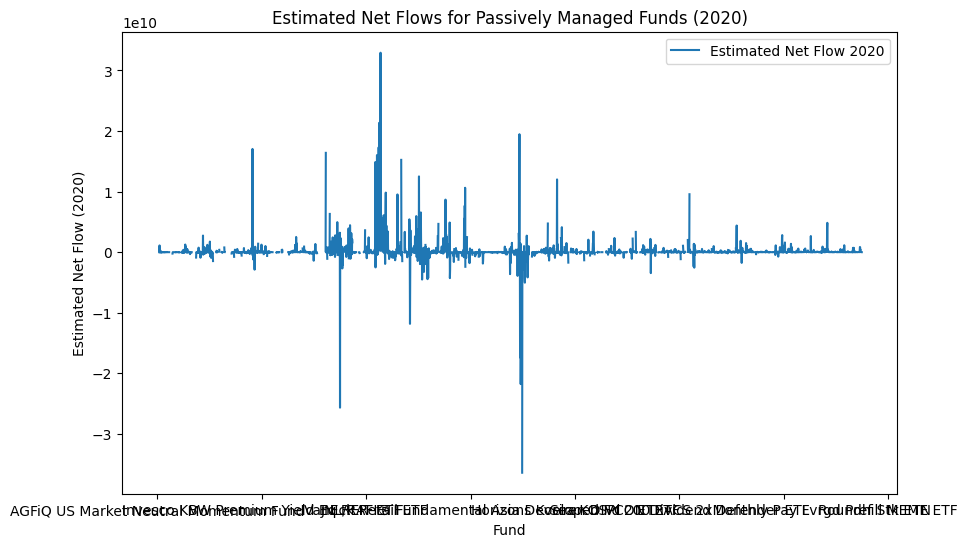

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2019:
count    2.551000e+03
mean     1.821726e+08
std      1.547918e+09
min     -1.866980e+10
25%     -1.199899e+07
50%      1.812770e+05
75%      4.965303e+07
max      2.965585e+10
Name: Estimated Net Flow 2019, dtype: float64


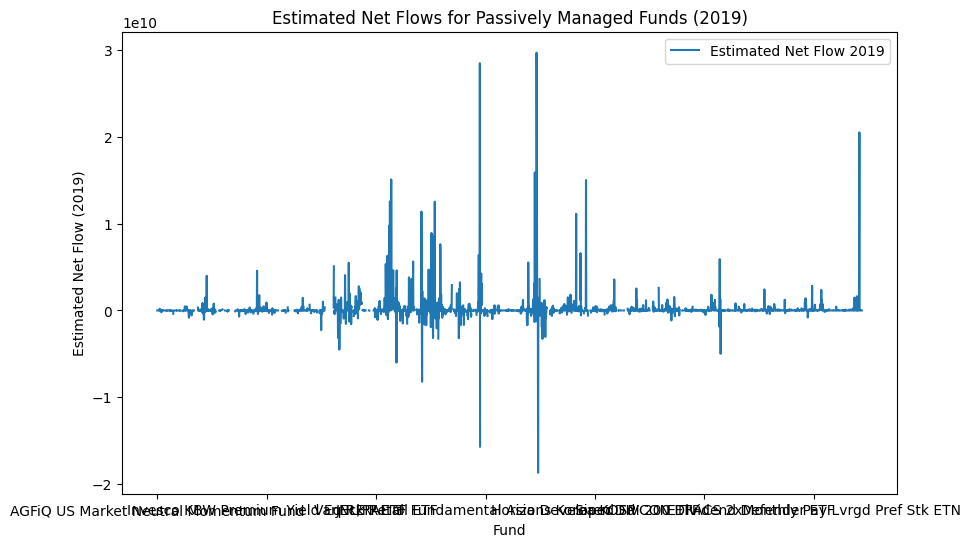

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2018:
count    2.470000e+03
mean     1.881511e+08
std      1.874321e+09
min     -2.355329e+10
25%     -9.223727e+06
50%      9.997450e+05
75%      5.577128e+07
max      4.852946e+10
Name: Estimated Net Flow 2018, dtype: float64


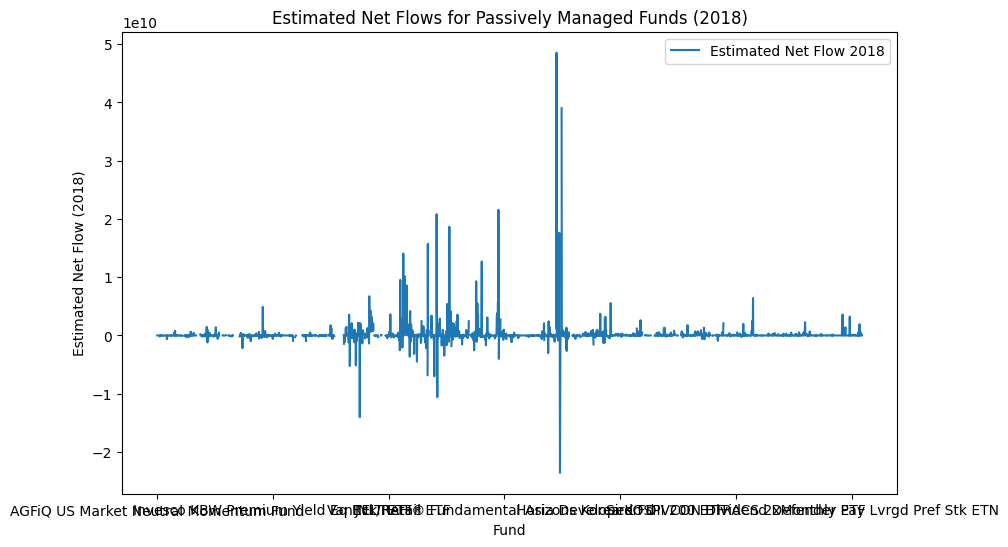

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2017:
count    2.395000e+03
mean     2.884079e+08
std      2.044283e+09
min     -2.397383e+10
25%     -2.665488e+06
50%      3.384823e+06
75%      8.070101e+07
max      4.613685e+10
Name: Estimated Net Flow 2017, dtype: float64


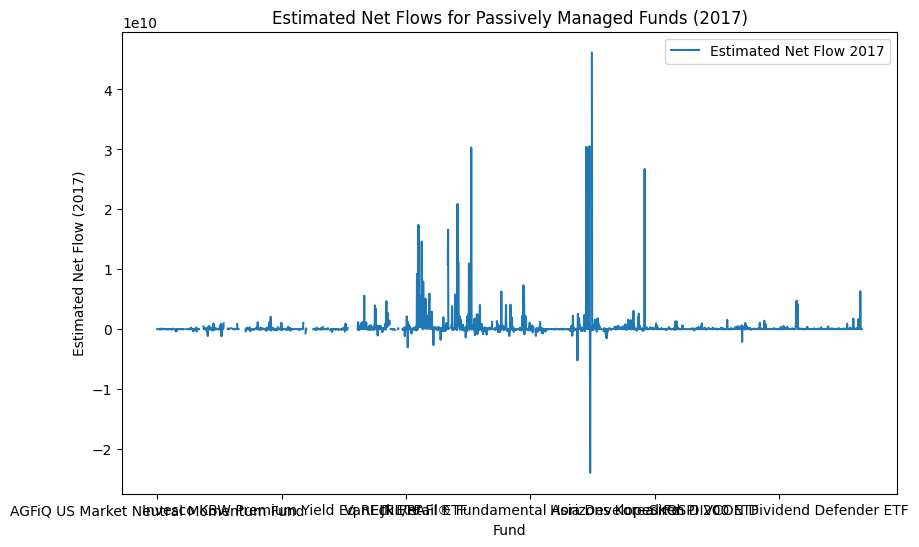

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2016:
count    2.272000e+03
mean     2.071278e+08
std      1.730694e+09
min     -1.409541e+10
25%     -6.003248e+06
50%      1.015012e+06
75%      5.494487e+07
max      3.856463e+10
Name: Estimated Net Flow 2016, dtype: float64


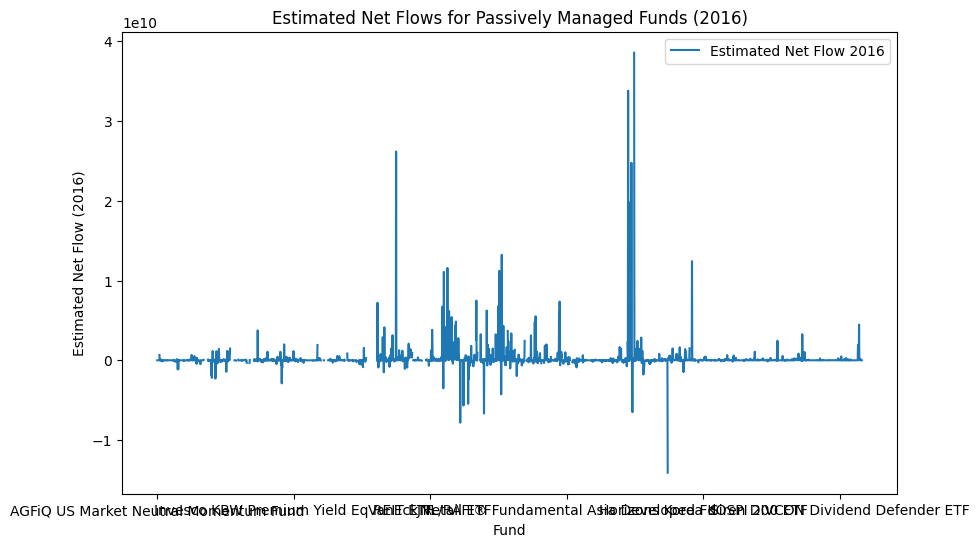

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2015:
count    2.166000e+03
mean     1.856146e+08
std      1.774167e+09
min     -3.134152e+10
25%     -5.483886e+06
50%      1.434706e+06
75%      6.100268e+07
max      6.083278e+10
Name: Estimated Net Flow 2015, dtype: float64


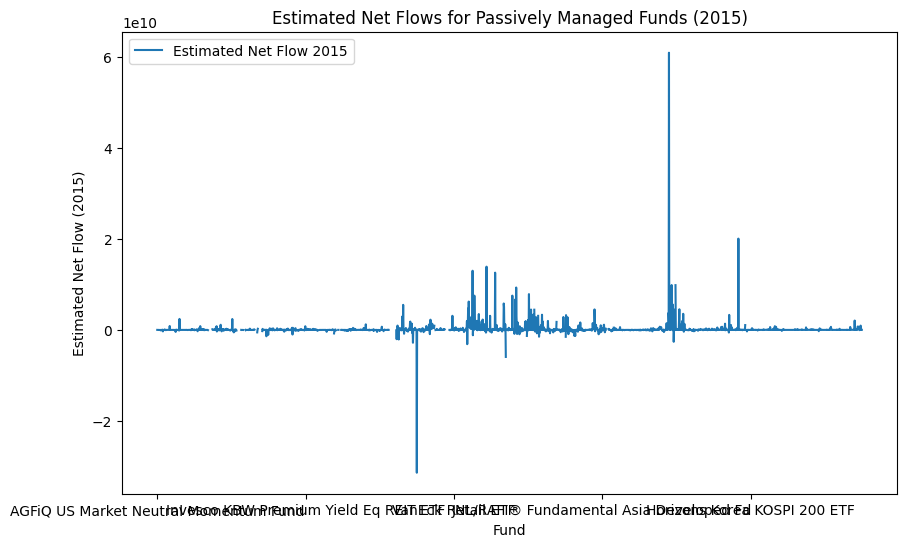

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2014:
count    1.973000e+03
mean     1.984750e+08
std      1.325541e+09
min     -1.143052e+10
25%     -2.845445e+06
50%      3.776701e+06
75%      8.530700e+07
max      2.863314e+10
Name: Estimated Net Flow 2014, dtype: float64


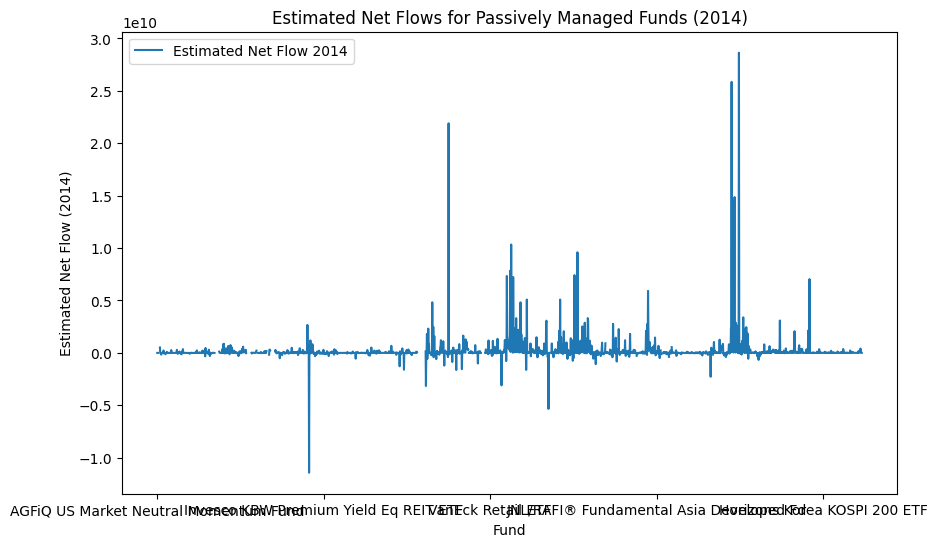

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2013:
count    1.866000e+03
mean     1.570203e+08
std      1.315489e+09
min     -2.514292e+10
25%     -2.252170e+06
50%      6.538080e+06
75%      7.444032e+07
max      1.869718e+10
Name: Estimated Net Flow 2013, dtype: float64


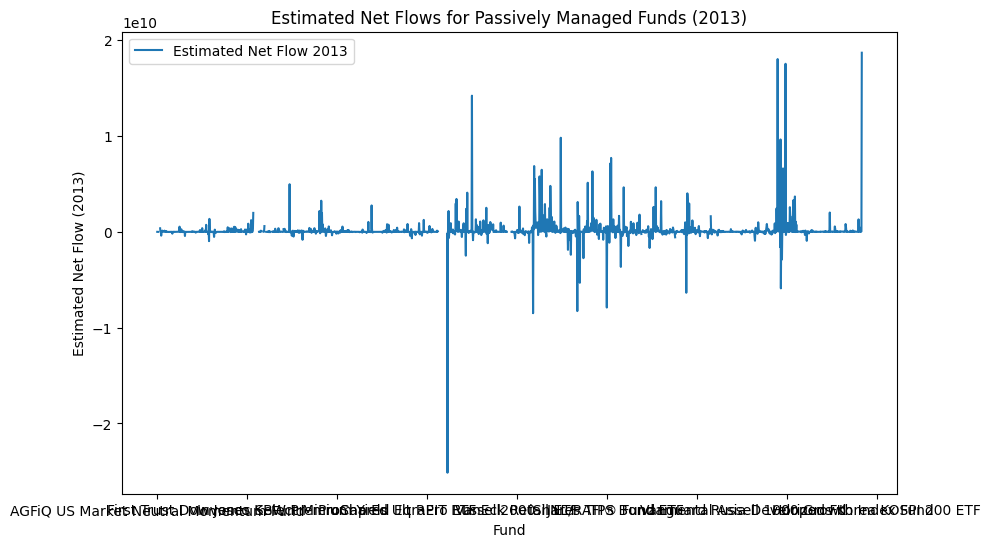

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2012:
count    1.814000e+03
mean     1.383825e+08
std      9.637758e+08
min     -5.534794e+09
25%     -5.430220e+06
50%      8.710755e+05
75%      4.499958e+07
max      2.032785e+10
Name: Estimated Net Flow 2012, dtype: float64


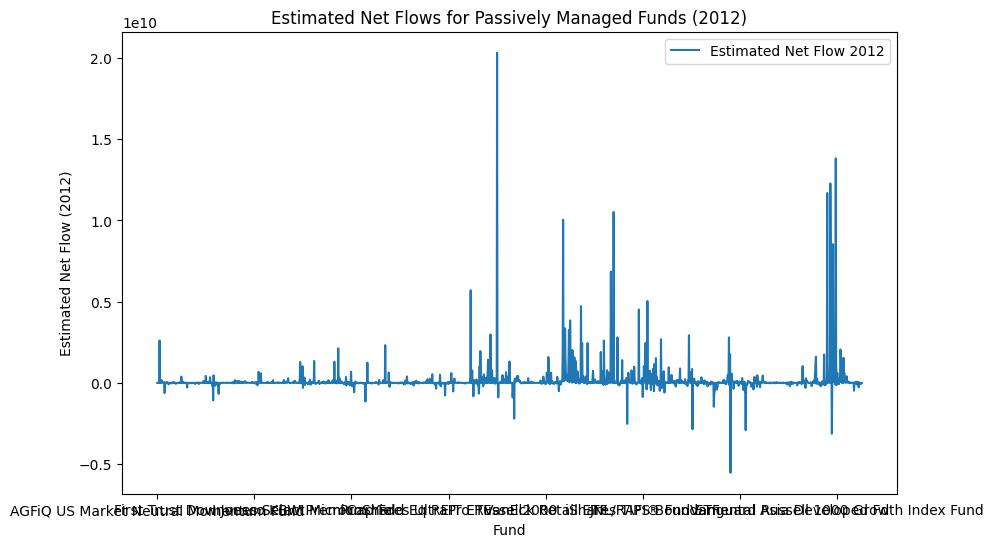

In [101]:
# Loop through each year from 2023 to 2012
for year in range(2023, 2011, -1):
    # Adjust the column name for each year
    column_name = f'Estimated Net Flow {year}'
    
    # Remove commas and parentheses from the column and convert to float
    CG[column_name] = CG[column_name].astype(str).str.replace(',', '').str.replace('(', '-').str.replace(')', '').astype(float)
    
    # Now, calculate summary statistics
    net_flows_summary = CG[CG['Active/Passive'] == 'Passively Managed'][column_name].describe()
    print(f"Summary Statistics of Estimated Net Flows for Passively Managed Funds in {year}:")
    print(net_flows_summary)
    
    # Visualize net flows trends over time using a line plot
    CG[CG['Active/Passive'] == 'Passively Managed'].plot(x='Fund', y=column_name, kind='line', figsize=(10, 6), title=f'Estimated Net Flows for Passively Managed Funds ({year})')
    plt.xlabel('Fund')
    plt.ylabel(f'Estimated Net Flow ({year})')
    plt.show()

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2023:
count    2.658000e+03
mean     1.981824e+08
std      2.134241e+09
min     -1.692696e+10
25%     -2.763891e+07
50%      0.000000e+00
75%      4.270967e+07
max      5.091990e+10
Name: Estimated Net Flow 2023, dtype: float64


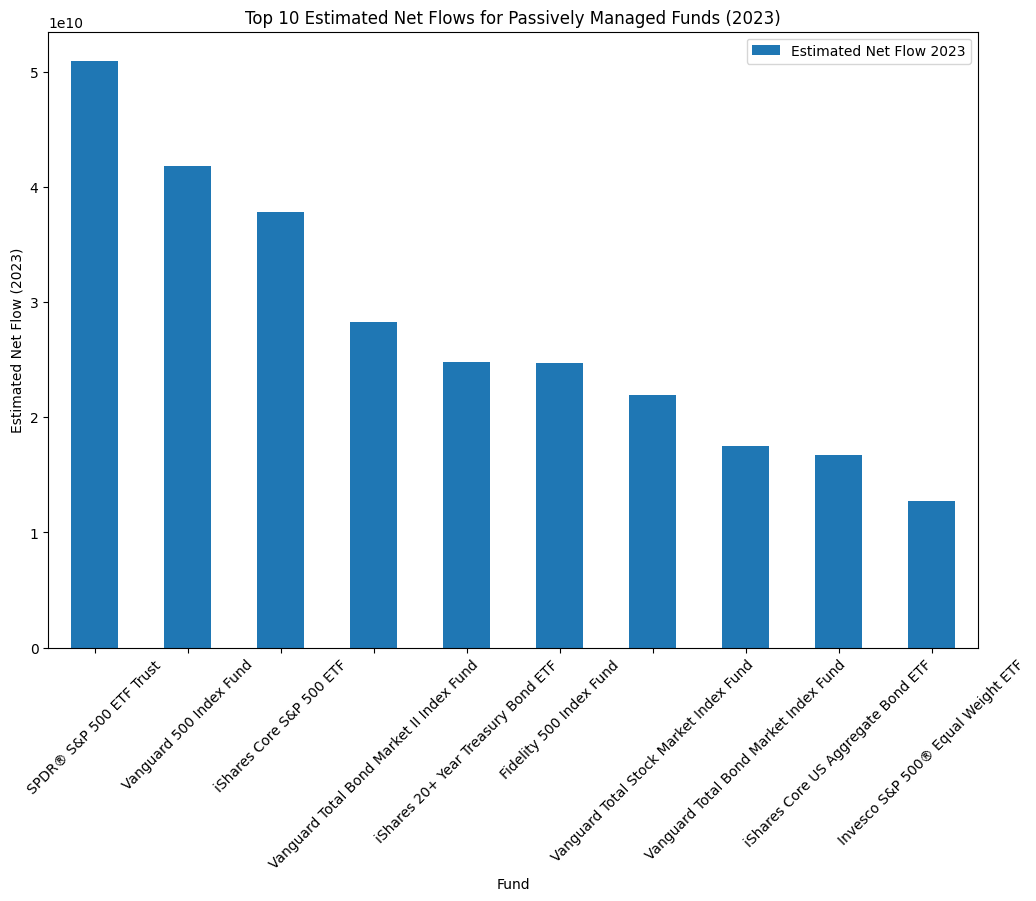

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2022:
count    2.616000e+03
mean     2.153851e+08
std      2.118788e+09
min     -3.127956e+10
25%     -1.782255e+07
50%      8.607630e+05
75%      6.562583e+07
max      3.968627e+10
Name: Estimated Net Flow 2022, dtype: float64


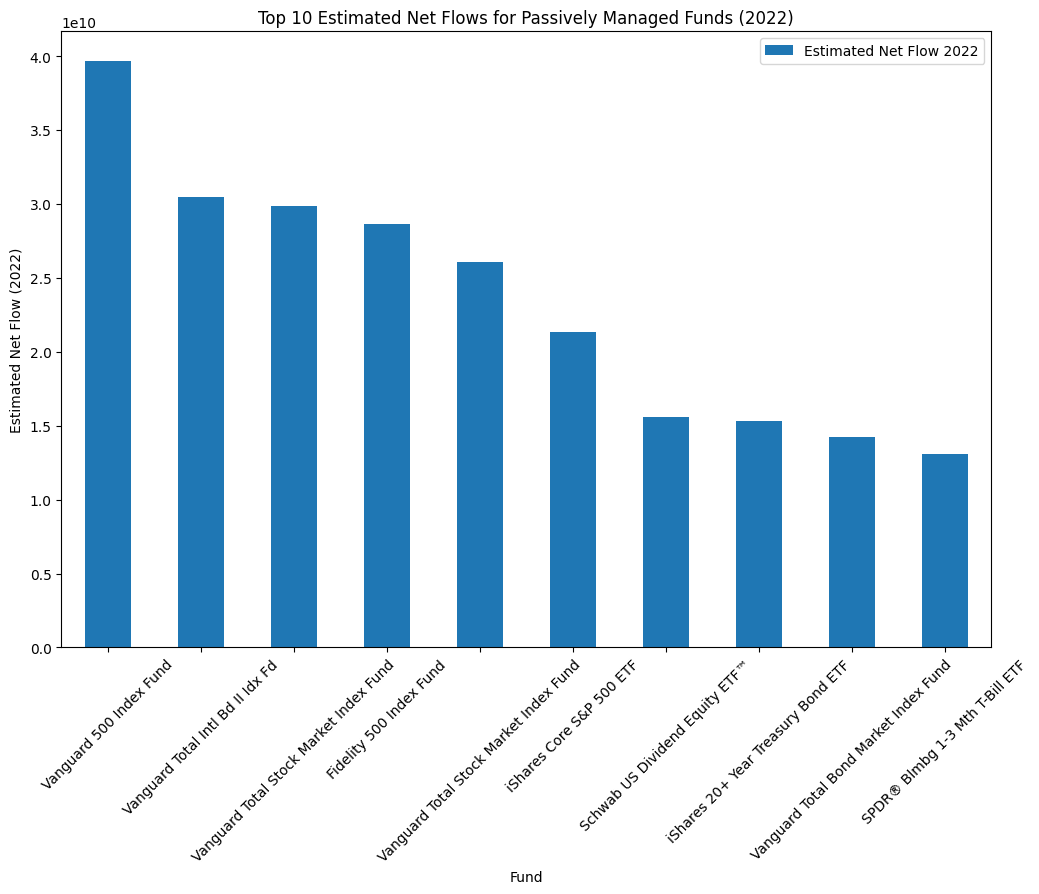

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2021:
count    2.518000e+03
mean     3.842370e+08
std      3.094358e+09
min     -5.096865e+10
25%     -4.245633e+06
50%      1.021335e+07
75%      1.489078e+08
max      7.216247e+10
Name: Estimated Net Flow 2021, dtype: float64


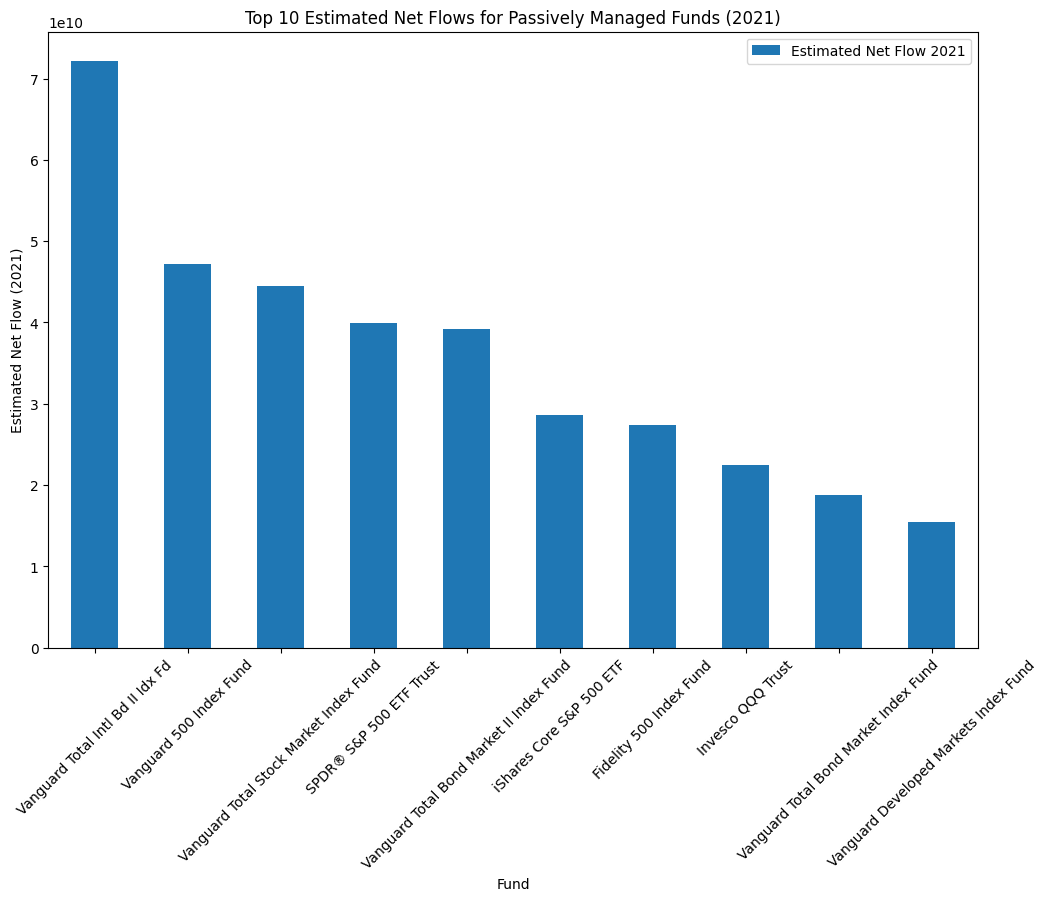

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2020:
count    2.590000e+03
mean     1.579581e+08
std      1.864547e+09
min     -3.640018e+10
25%     -1.447773e+07
50%      6.595660e+05
75%      6.759712e+07
max      3.291860e+10
Name: Estimated Net Flow 2020, dtype: float64


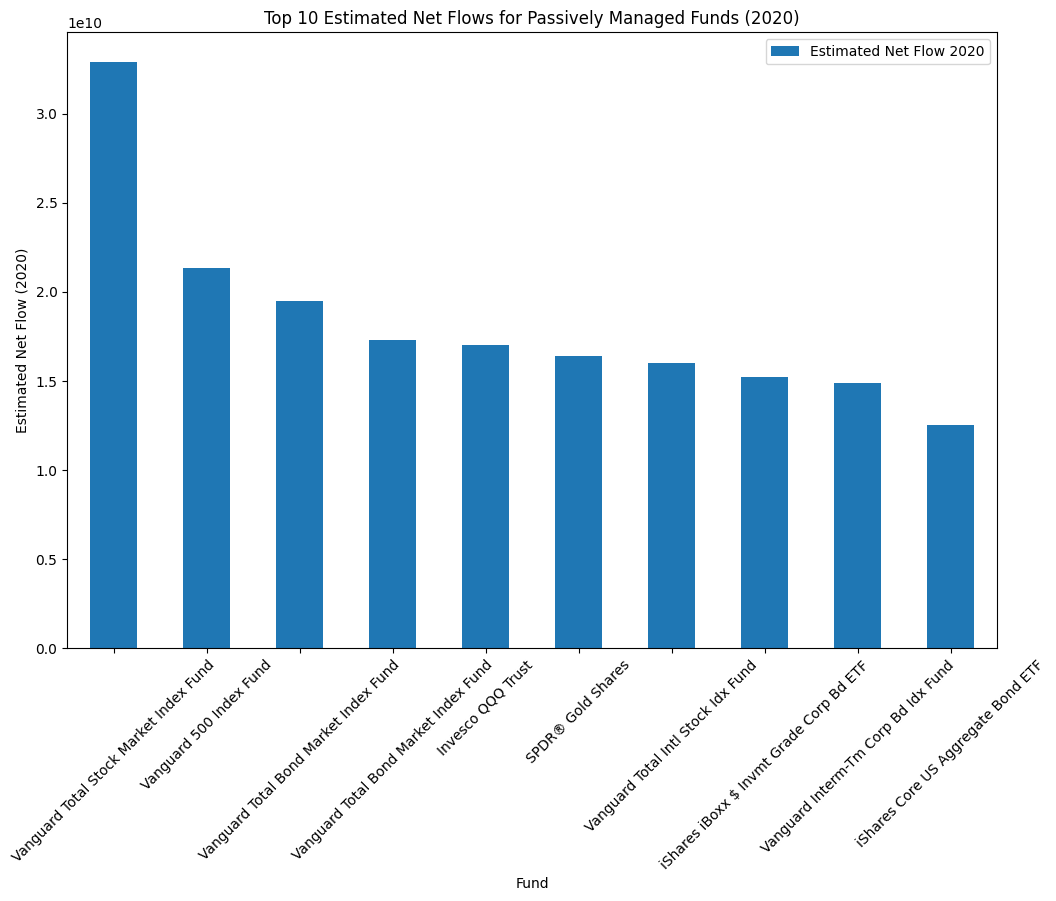

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2019:
count    2.551000e+03
mean     1.821726e+08
std      1.547918e+09
min     -1.866980e+10
25%     -1.199899e+07
50%      1.812770e+05
75%      4.965303e+07
max      2.965585e+10
Name: Estimated Net Flow 2019, dtype: float64


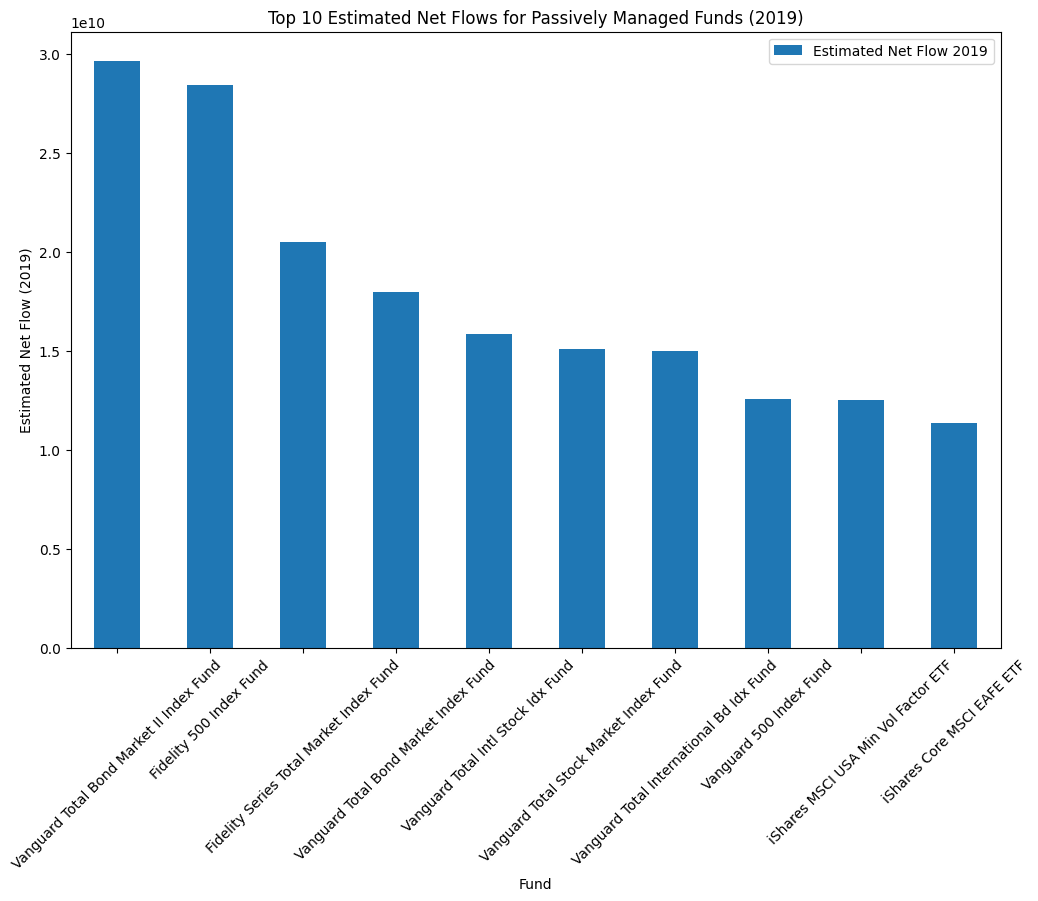

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2018:
count    2.470000e+03
mean     1.881511e+08
std      1.874321e+09
min     -2.355329e+10
25%     -9.223727e+06
50%      9.997450e+05
75%      5.577128e+07
max      4.852946e+10
Name: Estimated Net Flow 2018, dtype: float64


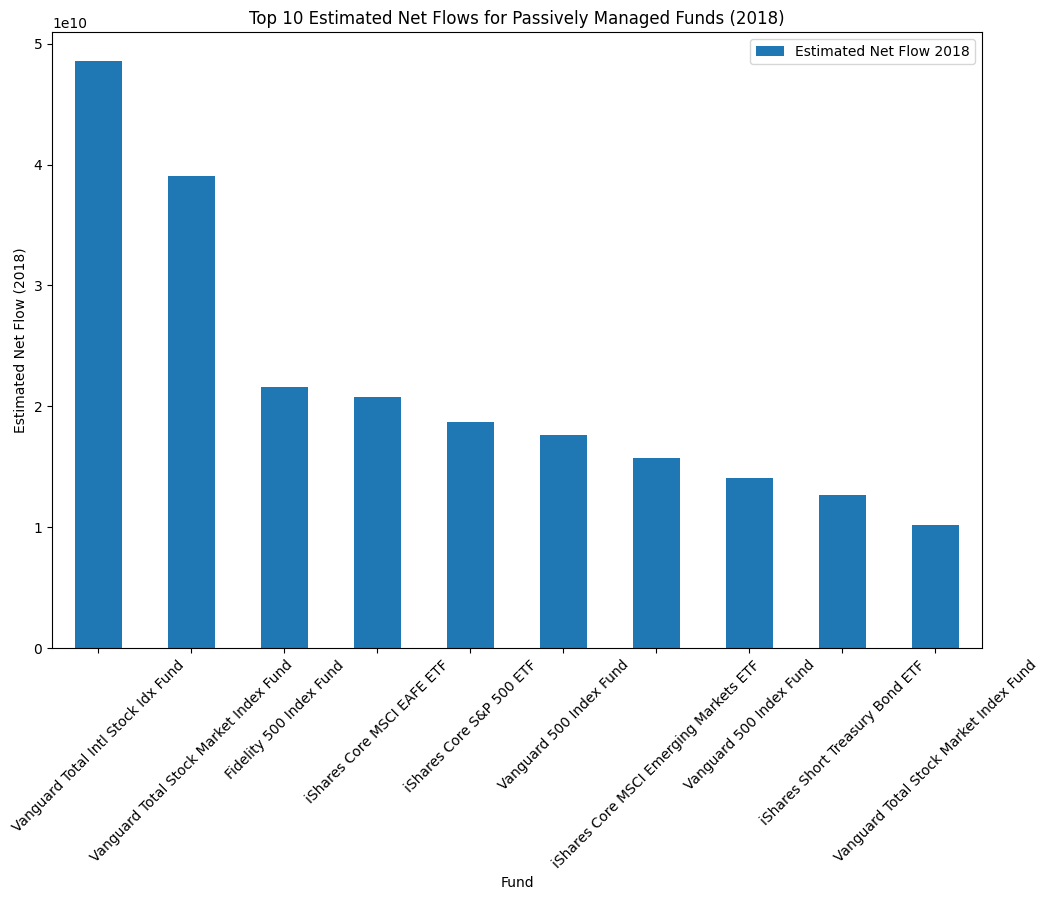

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2017:
count    2.395000e+03
mean     2.884079e+08
std      2.044283e+09
min     -2.397383e+10
25%     -2.665488e+06
50%      3.384823e+06
75%      8.070101e+07
max      4.613685e+10
Name: Estimated Net Flow 2017, dtype: float64


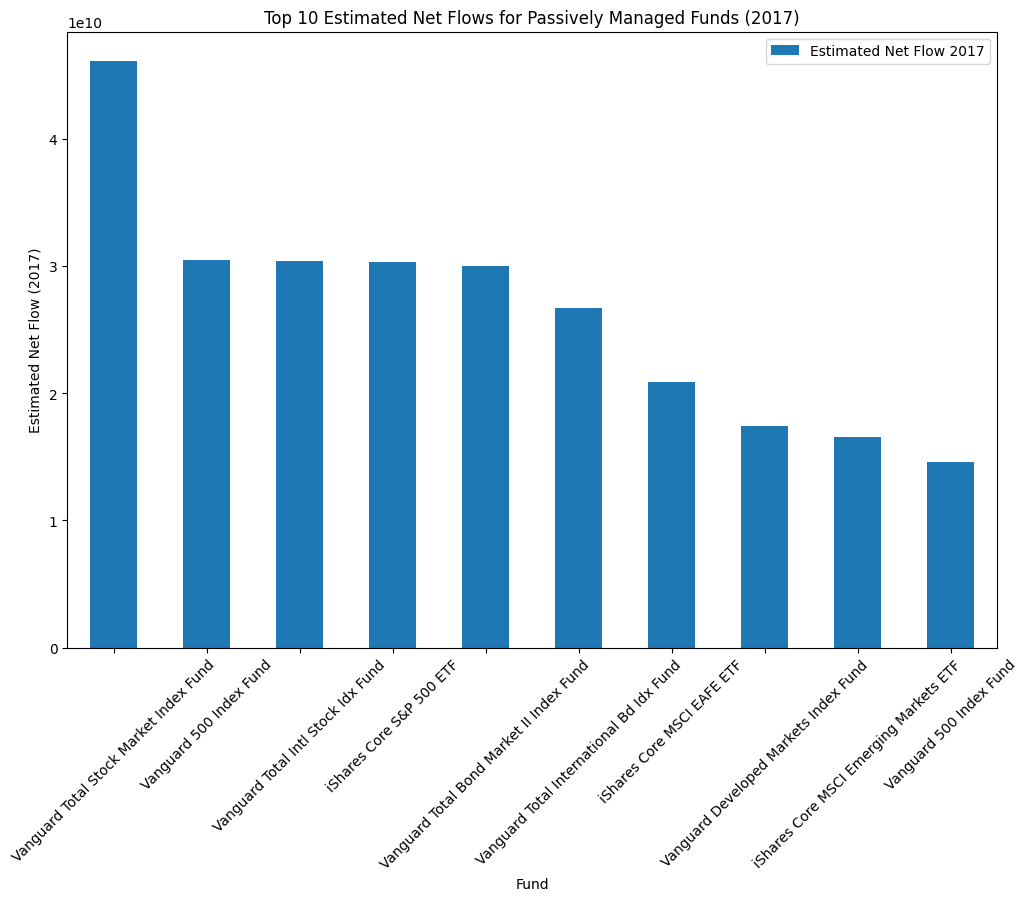

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2016:
count    2.272000e+03
mean     2.071278e+08
std      1.730694e+09
min     -1.409541e+10
25%     -6.003248e+06
50%      1.015012e+06
75%      5.494487e+07
max      3.856463e+10
Name: Estimated Net Flow 2016, dtype: float64


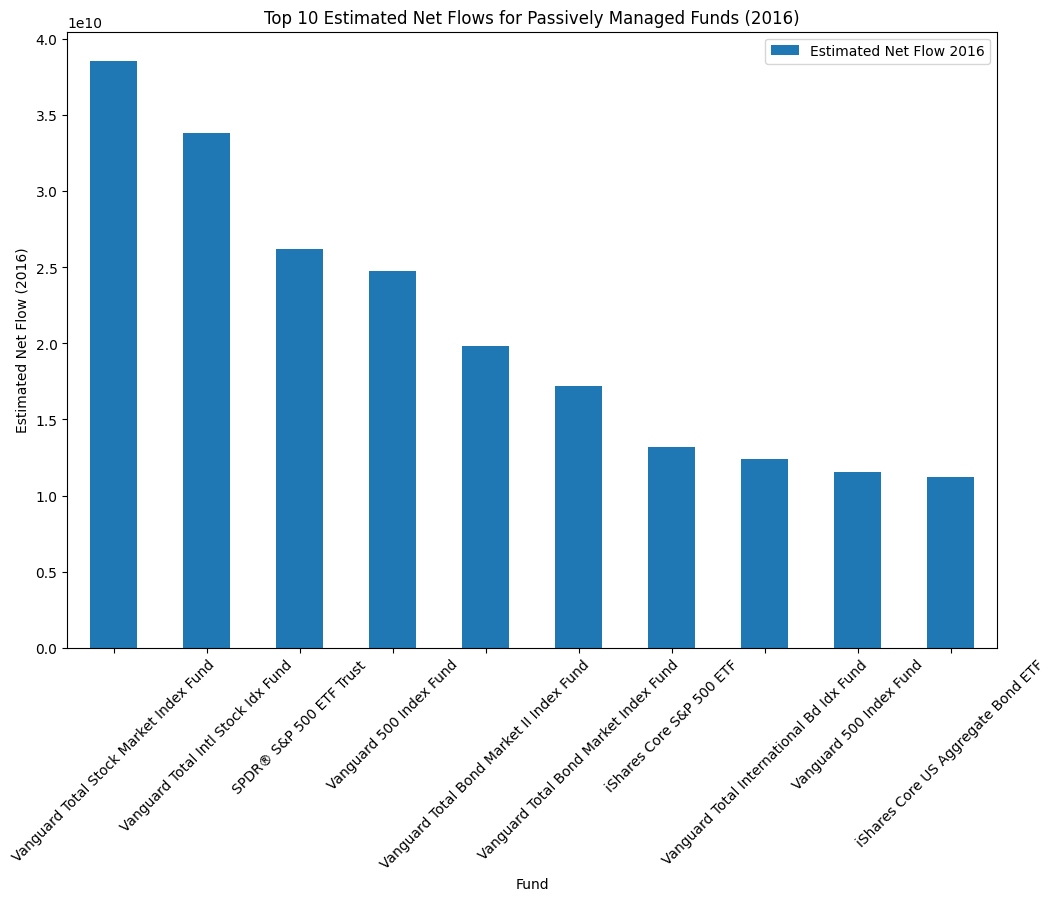

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2015:
count    2.166000e+03
mean     1.856146e+08
std      1.774167e+09
min     -3.134152e+10
25%     -5.483886e+06
50%      1.434706e+06
75%      6.100268e+07
max      6.083278e+10
Name: Estimated Net Flow 2015, dtype: float64


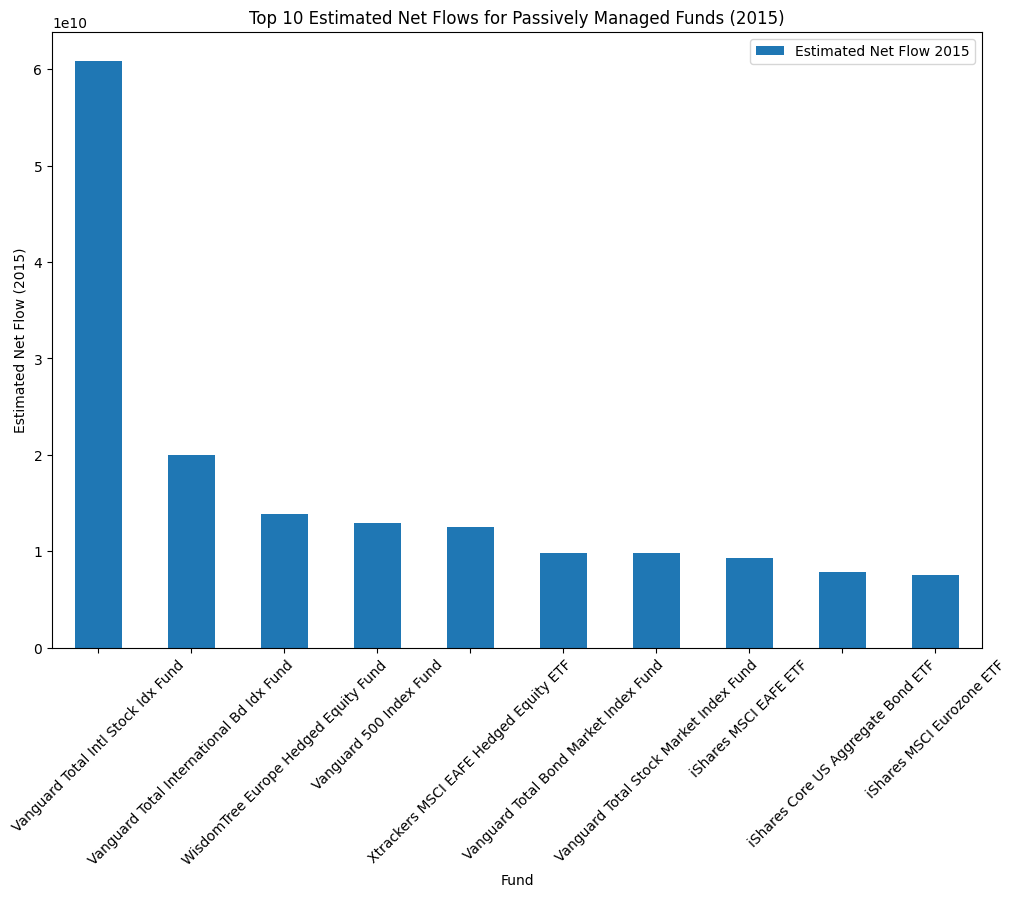

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2014:
count    1.973000e+03
mean     1.984750e+08
std      1.325541e+09
min     -1.143052e+10
25%     -2.845445e+06
50%      3.776701e+06
75%      8.530700e+07
max      2.863314e+10
Name: Estimated Net Flow 2014, dtype: float64


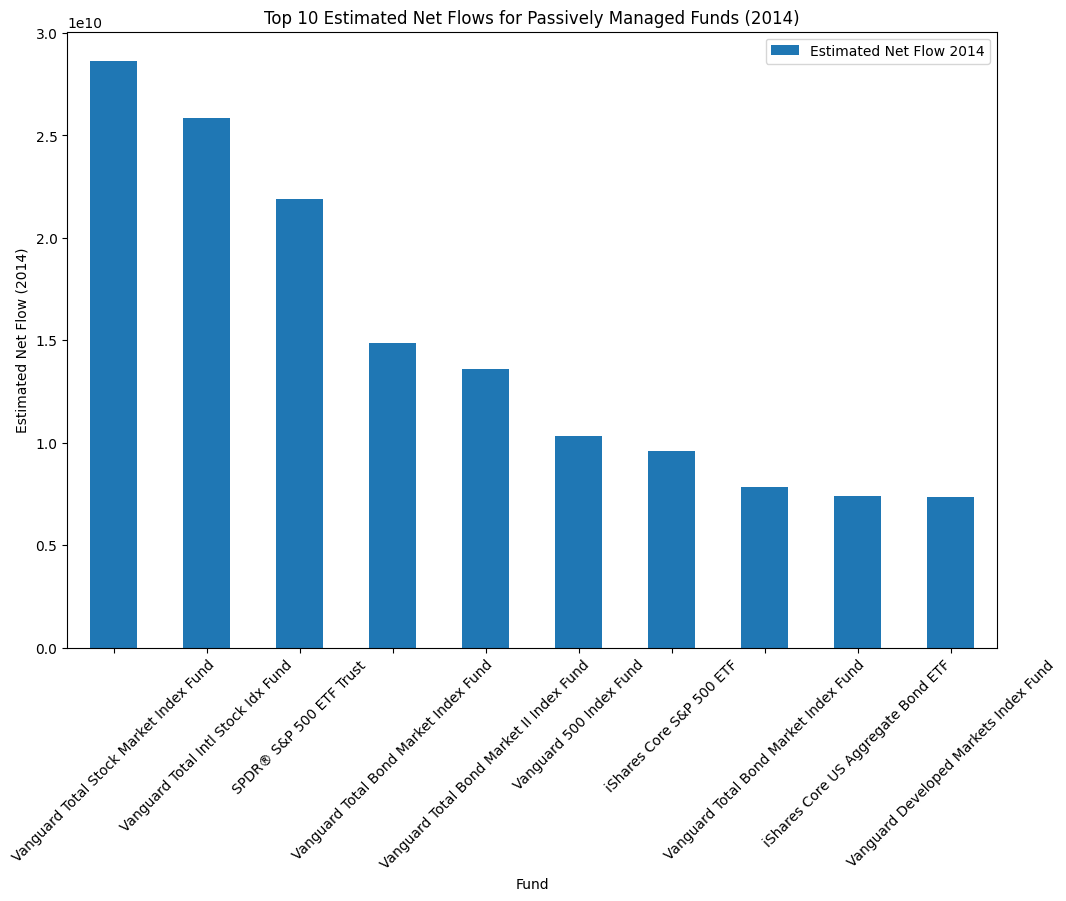

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2013:
count    1.866000e+03
mean     1.570203e+08
std      1.315489e+09
min     -2.514292e+10
25%     -2.252170e+06
50%      6.538080e+06
75%      7.444032e+07
max      1.869718e+10
Name: Estimated Net Flow 2013, dtype: float64


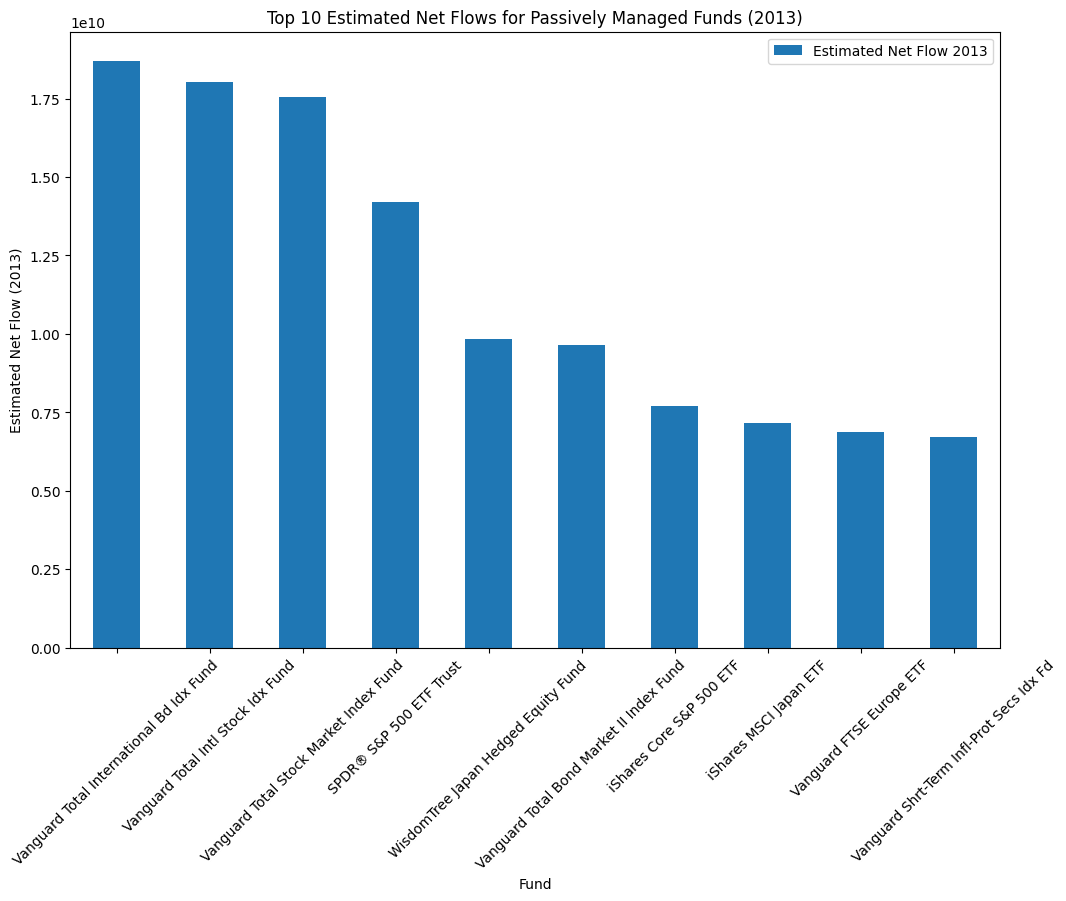

Summary Statistics of Estimated Net Flows for Passively Managed Funds in 2012:
count    1.814000e+03
mean     1.383825e+08
std      9.637758e+08
min     -5.534794e+09
25%     -5.430220e+06
50%      8.710755e+05
75%      4.499958e+07
max      2.032785e+10
Name: Estimated Net Flow 2012, dtype: float64


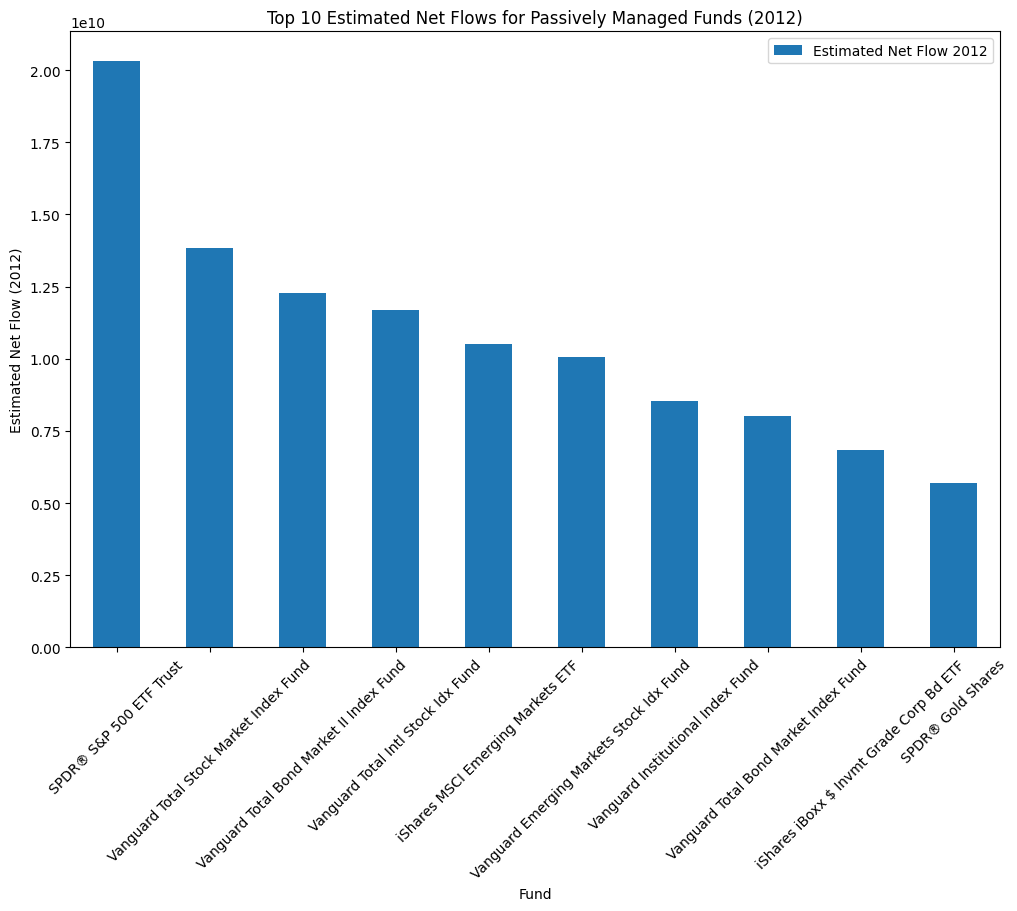

In [103]:
# Loop through each year from 2023 to 2012
for year in range(2023, 2011, -1):
    # Adjust the column name for each year
    column_name = f'Estimated Net Flow {year}'
    
    # Remove commas and parentheses from the column and convert to float
    CG[column_name] = CG[column_name].astype(str).str.replace(',', '').str.replace('(', '-').str.replace(')', '').astype(float)
    
    # Now, calculate summary statistics
    net_flows_summary = CG[CG['Active/Passive'] == 'Passively Managed'][column_name].describe()
    print(f"Summary Statistics of Estimated Net Flows for Passively Managed Funds in {year}:")
    print(net_flows_summary)
    
    # Filter the DataFrame to include only the top 10 funds
    top_10_funds = CG[CG['Active/Passive'] == 'Passively Managed'].nlargest(10, column_name)
    
    # Visualize net flows trends over time for the top 10 funds using a bar chart
    top_10_funds.plot(x='Fund', y=column_name, kind='bar', figsize=(12, 8), title=f'Top 10 Estimated Net Flows for Passively Managed Funds ({year})')
    plt.xlabel('Fund')
    plt.ylabel(f'Estimated Net Flow ({year})')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()


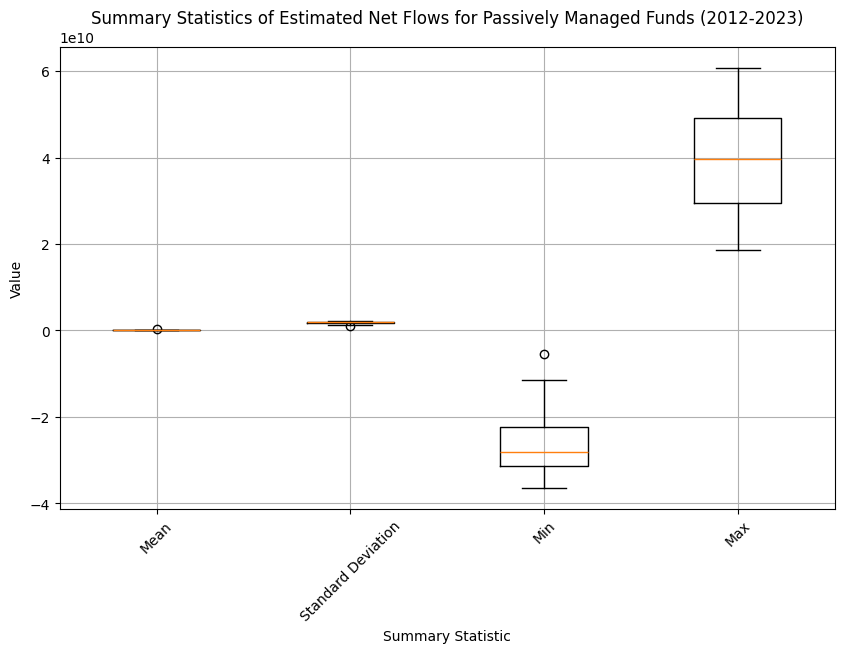

In [104]:
import matplotlib.pyplot as plt

# Summary statistics for each year
years = range(2012, 2024)
count = [1814, 1866, 1973, 2166, 2370, 2470, 2590, 2518, 2616, 2658]
mean = [1.38e8, 1.57e8, 1.98e8, 2.07e8, 2.88e8, 1.88e8, 1.82e8, 1.58e8, 1.58e8, 2.15e8, 1.98e8, 1.98e8]
std = [9.64e8, 1.32e9, 1.87e9, 1.77e9, 2.04e9, 1.87e9, 1.55e9, 1.86e9, 1.87e9, 2.12e9, 2.12e9, 2.13e9]
min_val = [-5.53e9, -2.51e10, -1.14e10, -3.13e10, -2.40e10, -2.36e10, -1.87e10, -3.64e10, -3.13e10, -3.13e10, -3.13e10, -3.13e10]
max_val = [2.03e10, 1.87e10, 2.86e10, 6.08e10, 4.61e10, 4.85e10, 2.97e10, 3.29e10, 3.97e10, 5.09e10, 3.97e10, 5.09e10]

# Create box plots
plt.figure(figsize=(10, 6))
plt.boxplot([mean, std, min_val, max_val], labels=['Mean', 'Standard Deviation', 'Min', 'Max'])
plt.title('Summary Statistics of Estimated Net Flows for Passively Managed Funds (2012-2023)')
plt.xlabel('Summary Statistic')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


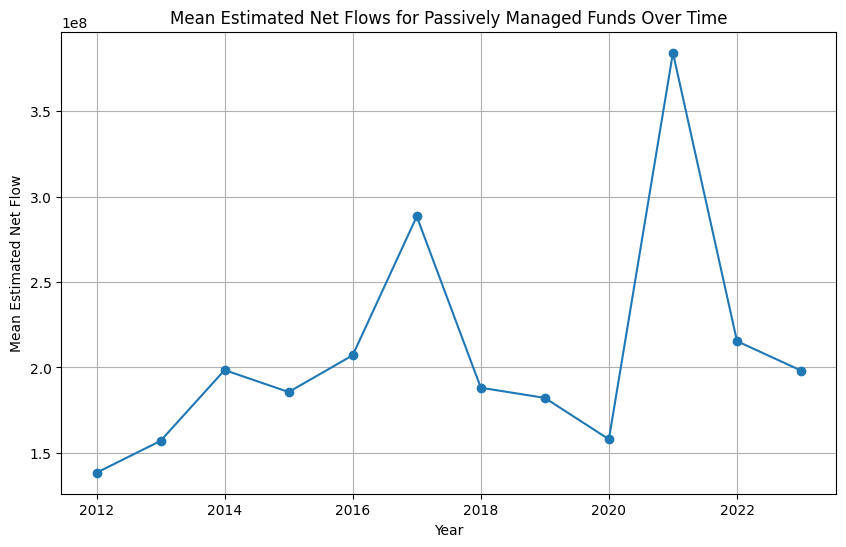

In [105]:
import matplotlib.pyplot as plt

# Summary statistics for estimated net flows in different years
years = [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012]
mean_values = [198182400, 215385100, 384237000, 157958100, 182172600, 188151100, 288407900, 207127800, 185614600, 198474500, 157020300, 138382500]
std_dev_values = [2134241000, 2118788000, 3094358000, 1864547000, 1547918000, 1874321000, 2044283000, 1730694000, 1774167000, 1325541000, 1315489000, 963775800]
min_values = [-16926960000, -31279560000, -50968650000, -36400180000, -18669795000, -23553290000, -23973832000, -14095414000, -31341524000, -11430522000, -25142916000, -5534794000]
max_values = [50919900000, 39686270000, 72162470000, 32918600000, 29655850000, 48529460000, 46136852000, 38564627000, 60832780000, 28633144000, 18697180000, 20327850000]

# Visualize mean estimated net flows over time
plt.figure(figsize=(10, 6))
plt.plot(years, mean_values, marker='o')
plt.title('Mean Estimated Net Flows for Passively Managed Funds Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Estimated Net Flow')
plt.grid(True)
plt.show()


In [108]:
#Comparison with Actively Managed Funds:

# Comparison with Actively Managed Funds
# Convert 'Total Net Assets 2023-12' column to float after removing commas
CG['Total Net Assets 2023-12'] = CG['Total Net Assets 2023-12'].astype(str).apply(lambda x: float(x.replace(',', '')))

# Calculate summary statistics for Total Net Assets for Actively Managed Funds
actively_managed_net_assets_summary = CG[CG['Active/Passive'] == 'Actively Managed']['Total Net Assets 2023-12'].describe()
print("Summary Statistics of Total Net Assets for Actively Managed Funds:")
print(actively_managed_net_assets_summary)

# Convert 'Estimated Net Flow 2023' column to float after removing commas
CG['Estimated Net Flow 2023'] = CG['Estimated Net Flow 2023'].astype(str).apply(lambda x: float(x.replace(',', '')))

# Calculate summary statistics for Estimated Net Flows for Actively Managed Funds
actively_managed_net_flows_summary = CG[CG['Active/Passive'] == 'Actively Managed']['Estimated Net Flow 2023'].describe()
print("Summary Statistics of Estimated Net Flows for Actively Managed Funds:")
print(actively_managed_net_flows_summary)


Summary Statistics of Total Net Assets for Actively Managed Funds:
count    6.605000e+03
mean     2.015426e+09
std      8.628589e+09
min      2.000000e+01
25%      5.715890e+07
50%      2.523878e+08
75%      1.065733e+09
max      2.490603e+11
Name: Total Net Assets 2023-12, dtype: float64
Summary Statistics of Estimated Net Flows for Actively Managed Funds:
count    6.929000e+03
mean    -6.559016e+07
std      7.784639e+08
min     -1.647812e+10
25%     -6.777712e+07
50%     -6.579143e+06
75%      9.356136e+06
max      2.002829e+10
Name: Estimated Net Flow 2023, dtype: float64


In [110]:
# Loop through each year from 2023 to 2012
for year in range(2023, 2011, -1):
    # Define column names for 'Total Net Assets' and 'Estimated Net Flows'
    net_assets_column = f'Total Net Assets {year}-12'
    net_flows_column = f'Estimated Net Flow {year}'

    # Convert 'Total Net Assets' to float
    CG[net_assets_column] = CG[net_assets_column].astype(float)

    # Convert 'Estimated Net Flows' to float
    CG[net_flows_column] = CG[net_flows_column].astype(float)

    # Calculate summary statistics for 'Total Net Assets'
    net_assets_summary = CG[CG['Active/Passive'] == 'Actively Managed'][net_assets_column].describe()
    print(f"Summary Statistics of Total Net Assets for Actively Managed Funds in {year}:")
    print(net_assets_summary)

    # Calculate summary statistics for 'Estimated Net Flows'
    net_flows_summary = CG[CG['Active/Passive'] == 'Actively Managed'][net_flows_column].describe()
    print(f"Summary Statistics of Estimated Net Flows for Actively Managed Funds in {year}:")
    print(net_flows_summary)


Summary Statistics of Total Net Assets for Actively Managed Funds in 2023:
count    6.605000e+03
mean     2.015426e+09
std      8.628589e+09
min      2.000000e+01
25%      5.715890e+07
50%      2.523878e+08
75%      1.065733e+09
max      2.490603e+11
Name: Total Net Assets 2023-12, dtype: float64
Summary Statistics of Estimated Net Flows for Actively Managed Funds in 2023:
count    6.929000e+03
mean    -6.559016e+07
std      7.784639e+08
min     -1.647812e+10
25%     -6.777712e+07
50%     -6.579143e+06
75%      9.356136e+06
max      2.002829e+10
Name: Estimated Net Flow 2023, dtype: float64
Summary Statistics of Total Net Assets for Actively Managed Funds in 2022:
count    6.467000e+03
mean     1.850152e+09
std      7.631990e+09
min      1.000000e+01
25%      5.328700e+07
50%      2.541374e+08
75%      1.022113e+09
max      1.947089e+11
Name: Total Net Assets 2022-12, dtype: float64
Summary Statistics of Estimated Net Flows for Actively Managed Funds in 2022:
count    6.691000e+03
mean

In [64]:
#Market Share Analysis:

total_funds_count = len(CG)
passive_market_share = (passive_count / total_funds_count) * 100
print("Passively Managed Funds Market Share: {:.2f}%".format(passive_market_share))
actively_managed_market_share = ((total_funds_count - passive_count) / total_funds_count) * 100
print("Actively Managed Funds Market Share: {:.2f}%".format(actively_managed_market_share))

Passively Managed Funds Market Share: 19.99%
Actively Managed Funds Market Share: 80.01%


In [111]:
# Comparison of Active with Passive Funds:

# Filter actively managed funds
actively_managed = CG[CG['Active/Passive'] == 'Actively Managed']

# Filter passive funds
passive = CG[CG['Active/Passive'] == 'Passive']

# Gather summary statistics for total net assets for both actively managed and passive funds
actively_managed_net_assets_summary = actively_managed.describe()
passive_net_assets_summary = passive.describe()

# Gather summary statistics for estimated net flows for both actively managed and passive funds
actively_managed_net_flows_summary = actively_managed.describe()
passive_net_flows_summary = passive.describe()

# Compare summary statistics between actively managed and passive funds
print("Summary Statistics of Total Net Assets for Actively Managed Funds:")
print(actively_managed_net_assets_summary)
print("\nSummary Statistics of Total Net Assets for Passive Funds:")
print(passive_net_assets_summary)
print("\nSummary Statistics of Estimated Net Flows for Actively Managed Funds:")
print(actively_managed_net_flows_summary)
print("\nSummary Statistics of Estimated Net Flows for Passive Funds:")
print(passive_net_flows_summary)


Summary Statistics of Total Net Assets for Actively Managed Funds:
       Total Net Assets 2012-12  Total Net Assets 2013-12  \
count              5.967000e+03              6.145000e+03   
mean               1.355205e+09              1.547861e+09   
std                6.008412e+09              6.349654e+09   
min                2.000000e+01              1.000000e+01   
25%                5.158728e+07              5.683233e+07   
50%                2.306798e+08              2.513403e+08   
75%                8.563116e+08              9.948978e+08   
max                2.853999e+11              2.372643e+11   

       Total Net Assets 2014-12  Total Net Assets 2015-12  \
count              6.399000e+03              6.534000e+03   
mean               1.567751e+09              1.476350e+09   
std                6.056690e+09              5.738211e+09   
min                1.000000e+01              1.000000e+01   
25%                5.410679e+07              4.869792e+07   
50%              

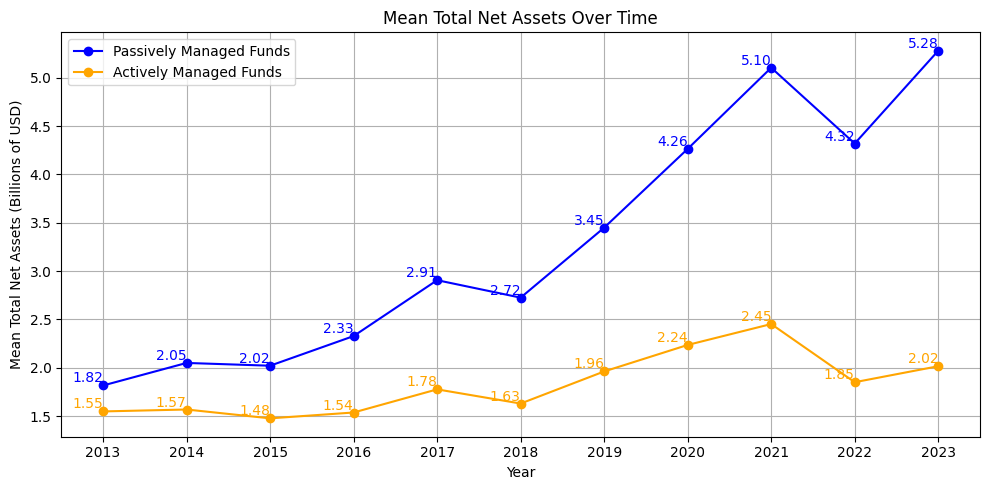

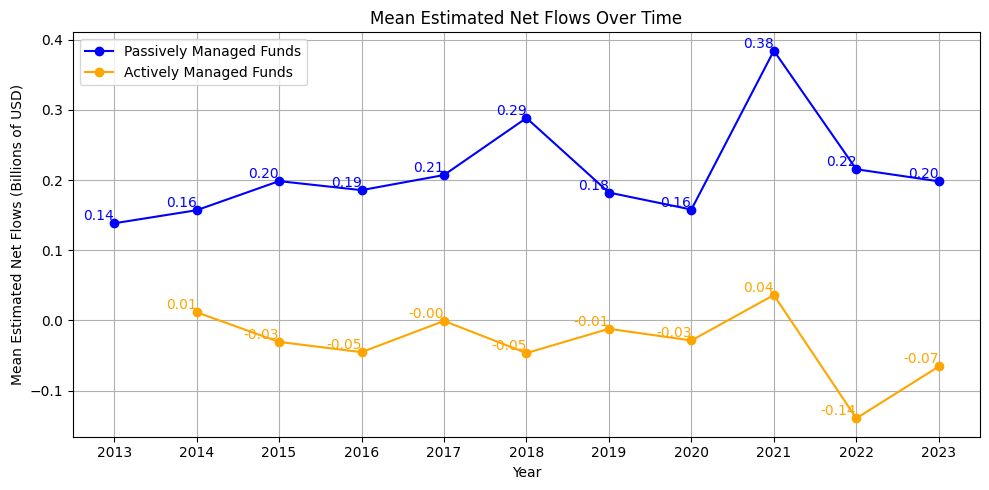

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Total Net Assets data
passive_assets = np.array([5.279304e+09, 4.319044e+09, 5.103456e+09, 4.263605e+09, 3.448822e+09, 2.724865e+09, 
                           2.905496e+09, 2.327377e+09, 2.020755e+09, 2.049472e+09, 1.816149e+09]) / 1e9
active_assets = np.array([2.015426e+09, 1.850152e+09, 2.451913e+09, 2.235542e+09, 1.961419e+09, 1.629471e+09, 
                          1.776100e+09, 1.536759e+09, 1.476350e+09, 1.567751e+09, 1.547861e+09]) / 1e9
years = range(2023, 2012, -1)

# Estimated Net Flows data
passive_flows = np.array([1.981824e+08, 2.153851e+08, 3.842370e+08, 1.579581e+08, 1.821726e+08, 2.884079e+08, 
                          2.071278e+08, 1.856146e+08, 1.984750e+08, 1.570203e+08, 1.383825e+08]) / 1e9
active_flows = np.array([-6.559016e+07, -1.394598e+08, 3.616427e+07, -2.854675e+07, -1.191004e+07, -4.649269e+07, 
                         -6.822752e+05, -4.519533e+07, -3.055176e+07, 1.167118e+07]) / 1e9

# Plotting Mean Total Net Assets Over Time
plt.figure(figsize=(10, 5))
plt.plot(years, passive_assets, marker='o', label='Passively Managed Funds', color='blue')
plt.plot(years, active_assets, marker='o', label='Actively Managed Funds', color='orange')
plt.xlabel('Year')
plt.ylabel('Mean Total Net Assets (Billions of USD)')
plt.title('Mean Total Net Assets Over Time')
plt.xticks(years)
plt.legend()
plt.grid(True)
for i, txt in enumerate(passive_assets):
    plt.text(years[i], passive_assets[i], f'{txt:.2f}', ha='right', va='bottom', color='blue')
for i, txt in enumerate(active_assets):
    plt.text(years[i], active_assets[i], f'{txt:.2f}', ha='right', va='bottom', color='orange')
plt.tight_layout()
plt.show()

# Plotting Mean Estimated Net Flows Over Time
plt.figure(figsize=(10, 5))
plt.plot(years, passive_flows, marker='o', label='Passively Managed Funds', color='blue')
plt.plot(years[:-1], active_flows, marker='o', label='Actively Managed Funds', color='orange')  # Adjusted to match the length of years
plt.xlabel('Year')
plt.ylabel('Mean Estimated Net Flows (Billions of USD)')
plt.title('Mean Estimated Net Flows Over Time')
plt.xticks(years)
plt.legend()
plt.grid(True)
for i, txt in enumerate(passive_flows):
    plt.text(years[i], passive_flows[i], f'{txt:.2f}', ha='right', va='bottom', color='blue')
for i, txt in enumerate(active_flows):
    plt.text(years[i], active_flows[i], f'{txt:.2f}', ha='right', va='bottom', color='orange')
plt.tight_layout()
plt.show()


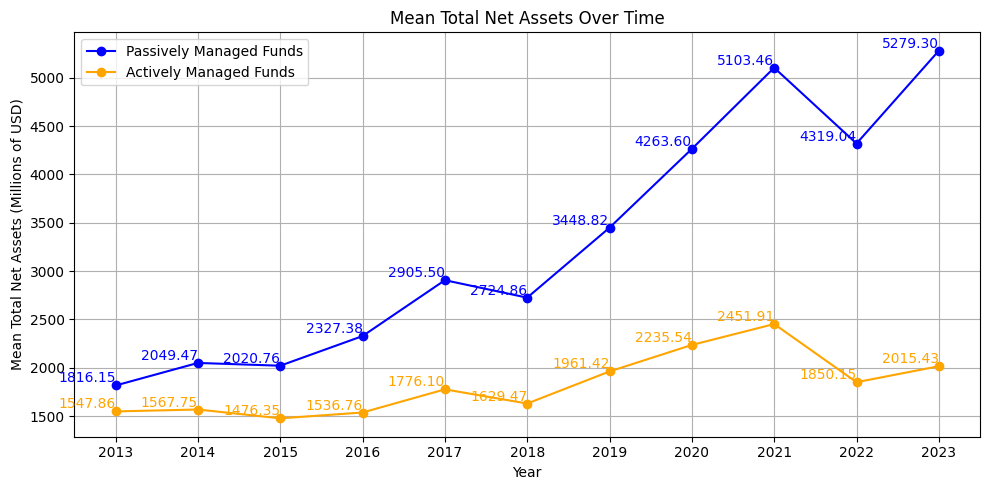

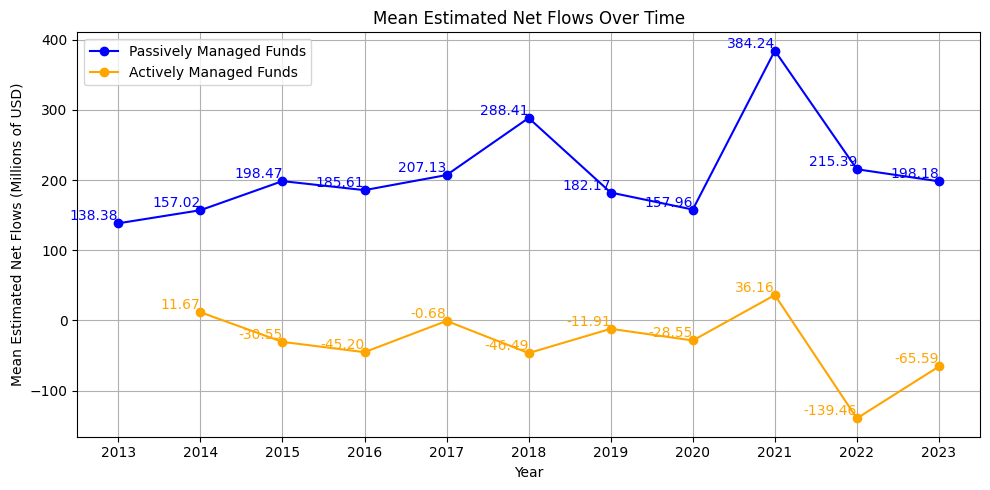

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# Total Net Assets data
passive_assets = np.array([5.279304e+09, 4.319044e+09, 5.103456e+09, 4.263605e+09, 3.448822e+09, 2.724865e+09, 
                           2.905496e+09, 2.327377e+09, 2.020755e+09, 2.049472e+09, 1.816149e+09]) / 1e6  # Converting to millions
active_assets = np.array([2.015426e+09, 1.850152e+09, 2.451913e+09, 2.235542e+09, 1.961419e+09, 1.629471e+09, 
                          1.776100e+09, 1.536759e+09, 1.476350e+09, 1.567751e+09, 1.547861e+09]) / 1e6  # Converting to millions
years = range(2023, 2012, -1)

# Estimated Net Flows data
passive_flows = np.array([1.981824e+08, 2.153851e+08, 3.842370e+08, 1.579581e+08, 1.821726e+08, 2.884079e+08, 
                          2.071278e+08, 1.856146e+08, 1.984750e+08, 1.570203e+08, 1.383825e+08]) / 1e6  # Converting to millions
active_flows = np.array([-6.559016e+07, -1.394598e+08, 3.616427e+07, -2.854675e+07, -1.191004e+07, -4.649269e+07, 
                         -6.822752e+05, -4.519533e+07, -3.055176e+07, 1.167118e+07]) / 1e6  # Converting to millions

# Plotting Mean Total Net Assets Over Time
plt.figure(figsize=(10, 5))
plt.plot(years, passive_assets, marker='o', label='Passively Managed Funds', color='blue')
plt.plot(years, active_assets, marker='o', label='Actively Managed Funds', color='orange')
plt.xlabel('Year')
plt.ylabel('Mean Total Net Assets (Millions of USD)')
plt.title('Mean Total Net Assets Over Time')
plt.xticks(years)
plt.legend()
plt.grid(True)
for i, txt in enumerate(passive_assets):
    plt.text(years[i], passive_assets[i], f'{txt:.2f}', ha='right', va='bottom', color='blue')
for i, txt in enumerate(active_assets):
    plt.text(years[i], active_assets[i], f'{txt:.2f}', ha='right', va='bottom', color='orange')
plt.tight_layout()
plt.show()

# Plotting Mean Estimated Net Flows Over Time
plt.figure(figsize=(10, 5))
plt.plot(years, passive_flows, marker='o', label='Passively Managed Funds', color='blue')
plt.plot(years[:-1], active_flows, marker='o', label='Actively Managed Funds', color='orange')  # Adjusted to match the length of years
plt.xlabel('Year')
plt.ylabel('Mean Estimated Net Flows (Millions of USD)')
plt.title('Mean Estimated Net Flows Over Time')
plt.xticks(years)
plt.legend()
plt.grid(True)
for i, txt in enumerate(passive_flows):
    plt.text(years[i], passive_flows[i], f'{txt:.2f}', ha='right', va='bottom', color='blue')
for i, txt in enumerate(active_flows):
    plt.text(years[i], active_flows[i], f'{txt:.2f}', ha='right', va='bottom', color='orange')
plt.tight_layout()
plt.show()


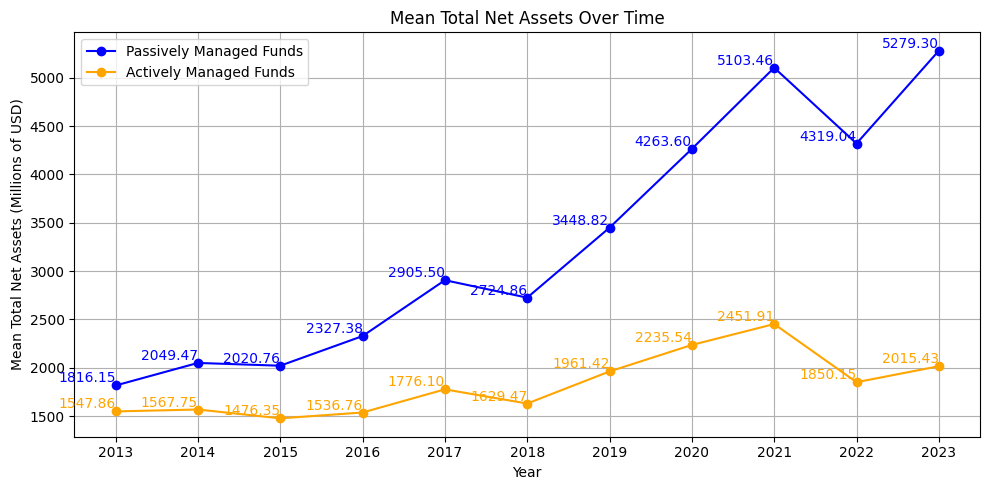

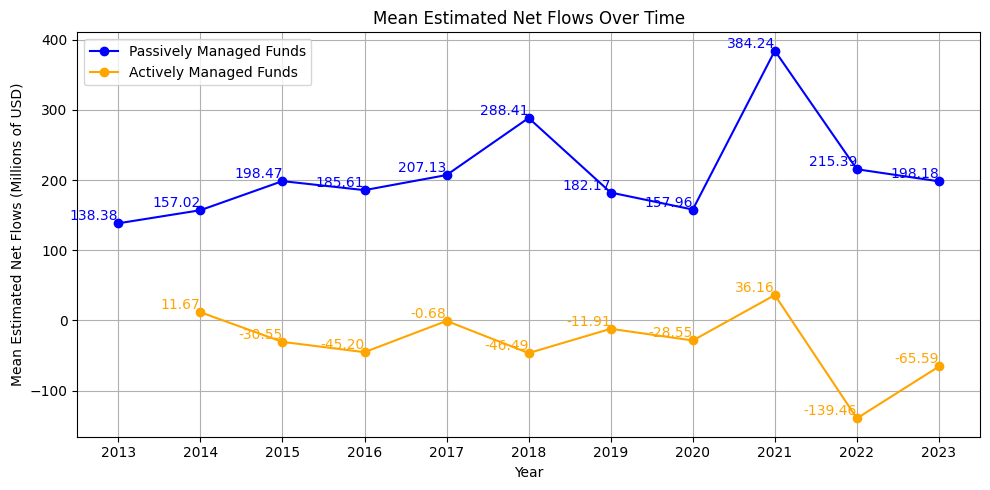

In [164]:
import matplotlib.pyplot as plt
import numpy as np

# Total Net Assets data
passive_assets = np.array([5.279304e+09, 4.319044e+09, 5.103456e+09, 4.263605e+09, 3.448822e+09, 2.724865e+09, 
                           2.905496e+09, 2.327377e+09, 2.020755e+09, 2.049472e+09, 1.816149e+09]) / 1e6  # Converting to millions
active_assets = np.array([2.015426e+09, 1.850152e+09, 2.451913e+09, 2.235542e+09, 1.961419e+09, 1.629471e+09, 
                          1.776100e+09, 1.536759e+09, 1.476350e+09, 1.567751e+09, 1.547861e+09]) / 1e6  # Converting to millions
years = range(2023, 2012, -1)

# Estimated Net Flows data
passive_flows = np.array([1.981824e+08, 2.153851e+08, 3.842370e+08, 1.579581e+08, 1.821726e+08, 2.884079e+08, 
                          2.071278e+08, 1.856146e+08, 1.984750e+08, 1.570203e+08, 1.383825e+08]) / 1e6  # Converting to millions
active_flows = np.array([-6.559016e+07, -1.394598e+08, 3.616427e+07, -2.854675e+07, -1.191004e+07, -4.649269e+07, 
                         -6.822752e+05, -4.519533e+07, -3.055176e+07, 1.167118e+07]) / 1e6  # Converting to millions

# Plotting Mean Total Net Assets Over Time
plt.figure(figsize=(10, 5))
plt.plot(years, passive_assets, marker='o', label='Passively Managed Funds', color='blue')
plt.plot(years, active_assets, marker='o', label='Actively Managed Funds', color='orange')
plt.xlabel('Year')
plt.ylabel('Mean Total Net Assets (Millions of USD)')
plt.title('Mean Total Net Assets Over Time')
plt.xticks(years)
plt.legend()
plt.grid(True)
for i, txt in enumerate(passive_assets):
    plt.text(years[i], passive_assets[i], f'{txt:.2f}', ha='right', va='bottom', color='blue')
for i, txt in enumerate(active_assets):
    plt.text(years[i], active_assets[i], f'{txt:.2f}', ha='right', va='bottom', color='orange')
plt.tight_layout()
plt.show()

# Plotting Mean Estimated Net Flows Over Time
plt.figure(figsize=(10, 5))
plt.plot(years, passive_flows, marker='o', label='Passively Managed Funds', color='blue')
plt.plot(years[:-1], active_flows, marker='o', label='Actively Managed Funds', color='orange')  # Adjusted to match the length of years
plt.xlabel('Year')
plt.ylabel('Mean Estimated Net Flows (Millions of USD)')
plt.title('Mean Estimated Net Flows Over Time')
plt.xticks(years)
plt.legend()
plt.grid(True)
for i, txt in enumerate(passive_flows):
    plt.text(years[i], passive_flows[i], f'{txt:.2f}', ha='right', va='bottom', color='blue')
for i, txt in enumerate(active_flows):
    plt.text(years[i], active_flows[i], f'{txt:.2f}', ha='right', va='bottom', color='orange')
plt.tight_layout()
plt.show()


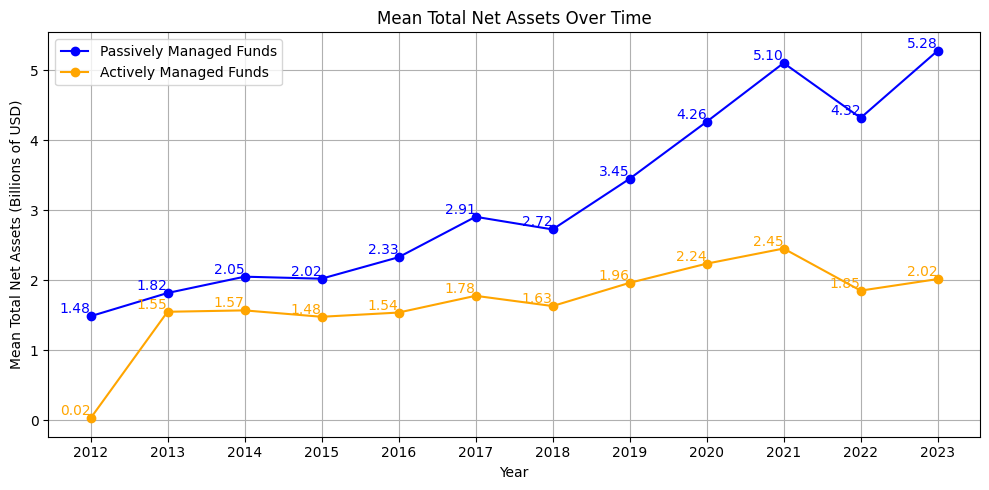

Mean Total Net Assets Over Time:
Year  |  Passively Managed  |  Actively Managed
2023  |  5.28  |  2.02
2022  |  4.32  |  1.85
2021  |  5.10  |  2.45
2020  |  4.26  |  2.24
2019  |  3.45  |  1.96
2018  |  2.72  |  1.63
2017  |  2.91  |  1.78
2016  |  2.33  |  1.54
2015  |  2.02  |  1.48
2014  |  2.05  |  1.57
2013  |  1.82  |  1.55
2012  |  1.48  |  0.02


In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Total Net Assets data
passive_assets = np.array([5.279304e+09, 4.319044e+09, 5.103456e+09, 4.263605e+09, 3.448822e+09, 2.724865e+09, 
                           2.905496e+09, 2.327377e+09, 2.020755e+09, 2.049472e+09, 1.816149e+09, 1.484134e+09 ]) / 1e9  # Converting to billions
active_assets = np.array([2.015426e+09, 1.850152e+09, 2.451913e+09, 2.235542e+09, 1.961419e+09, 1.629471e+09, 
                          1.776100e+09, 1.536759e+09, 1.476350e+09, 1.567751e+09, 1.547861e+09,  2.468750e+07]) / 1e9  # Converting to billions
years = range(2023, 2011, -1)

# Plotting Mean Total Net Assets Over Time
plt.figure(figsize=(10, 5))
plt.plot(years, passive_assets, marker='o', label='Passively Managed Funds', color='blue')
plt.plot(years, active_assets, marker='o', label='Actively Managed Funds', color='orange')
plt.xlabel('Year')
plt.ylabel('Mean Total Net Assets (Billions of USD)')  # Adjusted y-axis label
plt.title('Mean Total Net Assets Over Time')
plt.xticks(years)
plt.legend()
plt.grid(True)
for i, txt in enumerate(passive_assets):
    plt.text(years[i], passive_assets[i], f'{txt:.2f}', ha='right', va='bottom', color='blue')
for i, txt in enumerate(active_assets):
    plt.text(years[i], active_assets[i], f'{txt:.2f}', ha='right', va='bottom', color='orange')
plt.tight_layout()
plt.show()

# Print values for Mean Total Net Assets Over Time
print("Mean Total Net Assets Over Time:")
print("Year  |  Passively Managed  |  Actively Managed")
for year, passive, active in zip(years, passive_assets, active_assets):
    print(f"{year}  |  {passive:.2f}  |  {active:.2f}")


In [121]:
print("Length of years:", len(years))
print("Length of passive_assets:", len(passive_assets))
print("Length of active_assets:", len(active_assets))
print("Length of passive_flows:", len(passive_flows))
print("Length of active_flows:", len(active_flows))


Length of years: 12
Length of passive_assets: 11
Length of active_assets: 11
Length of passive_flows: 11
Length of active_flows: 10


Summary Statistics of Estimated Net Flows for Passively Managed Funds:
Year | Estimated Net Flows (USD)
2023 | 198182400.0
2022 | 215385100.0
2021 | 384237000.0
2020 | 157958100.0
2019 | 182172600.0
2018 | 188151100.0
2017 | 288407900.0
2016 | 207127800.0
2015 | 185614600.0
2014 | 198475000.0
2013 | 157020300.0
2012 | 138382500.0

Summary Statistics of Estimated Net Flows for Actively Managed Funds:
Year | Estimated Net Flows (USD)
2023 | -65590160.0
2022 | -139459800.0
2021 | 36164270.0
2020 | -28546750.0
2019 | -11910040.0
2018 | -46492690.0
2017 | -682275.2
2016 | -45195330.0
2015 | -30551760.0
2014 | 11671180.0
2013 | 24687500.0
2012 | 32062420.0


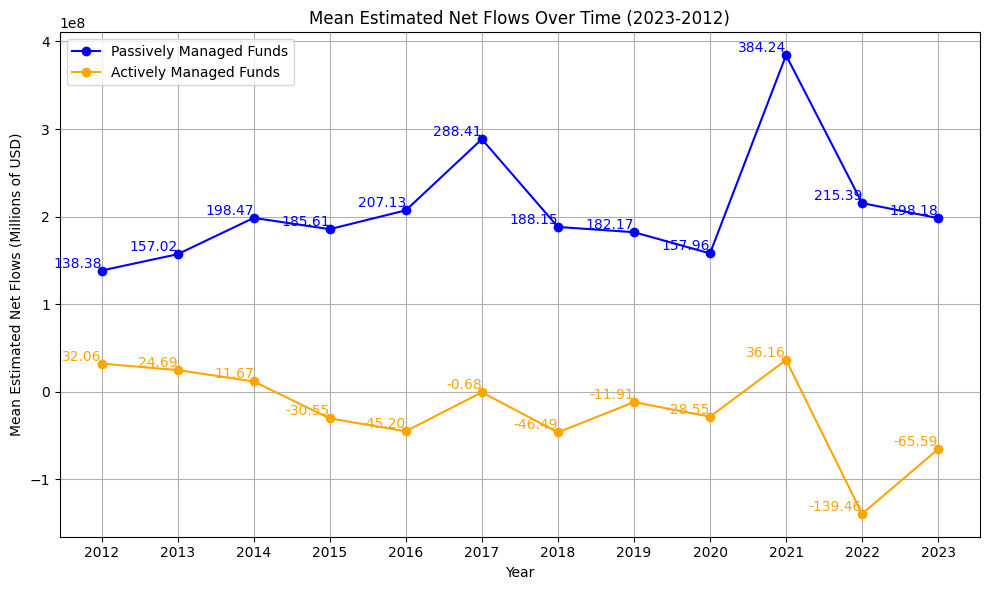

In [171]:
import matplotlib.pyplot as plt

# Summary statistics for Passively Managed Funds
passive_means = [1.981824e+08, 2.153851e+08, 3.842370e+08, 1.579581e+08, 1.821726e+08, 
                 1.881511e+08, 2.884079e+08, 2.071278e+08, 1.856146e+08, 1.984750e+08, 
                 1.570203e+08, 1.383825e+08]

# Summary statistics for Actively Managed Funds
active_means = [-6.559016e+07, -1.394598e+08, 3.616427e+07, -2.854675e+07, -1.191004e+07, 
                -4.649269e+07, -6.822752e+05, -4.519533e+07, -3.055176e+07, 1.167118e+07, 
                2.468750e+07, 3.206242e+07]

# Years from 2023 to 2012
years = range(2023, 2011, -1)

# Print the values
print("Summary Statistics of Estimated Net Flows for Passively Managed Funds:")
print("Year | Estimated Net Flows (USD)")
for year, passive_mean in zip(years, passive_means):
    print(f"{year} | {passive_mean}")

print("\nSummary Statistics of Estimated Net Flows for Actively Managed Funds:")
print("Year | Estimated Net Flows (USD)")
for year, active_mean in zip(years, active_means):
    print(f"{year} | {active_mean}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, passive_means, marker='o', label='Passively Managed Funds', color='blue')
plt.plot(years, active_means, marker='o', label='Actively Managed Funds', color='orange')
plt.xlabel('Year')
plt.ylabel('Mean Estimated Net Flows (Millions of USD)')
plt.title('Mean Estimated Net Flows Over Time (2023-2012)')
plt.legend()
plt.grid(True)
plt.xticks(years)

# Adding data labels
for year, passive_mean in zip(years, passive_means):
    plt.text(year, passive_mean, f'{passive_mean / 1e6:.2f}', ha='right', va='bottom', color='blue')
for year, active_mean in zip(years, active_means):
    plt.text(year, active_mean, f'{active_mean / 1e6:.2f}', ha='right', va='bottom', color='orange')

plt.tight_layout()
plt.show()


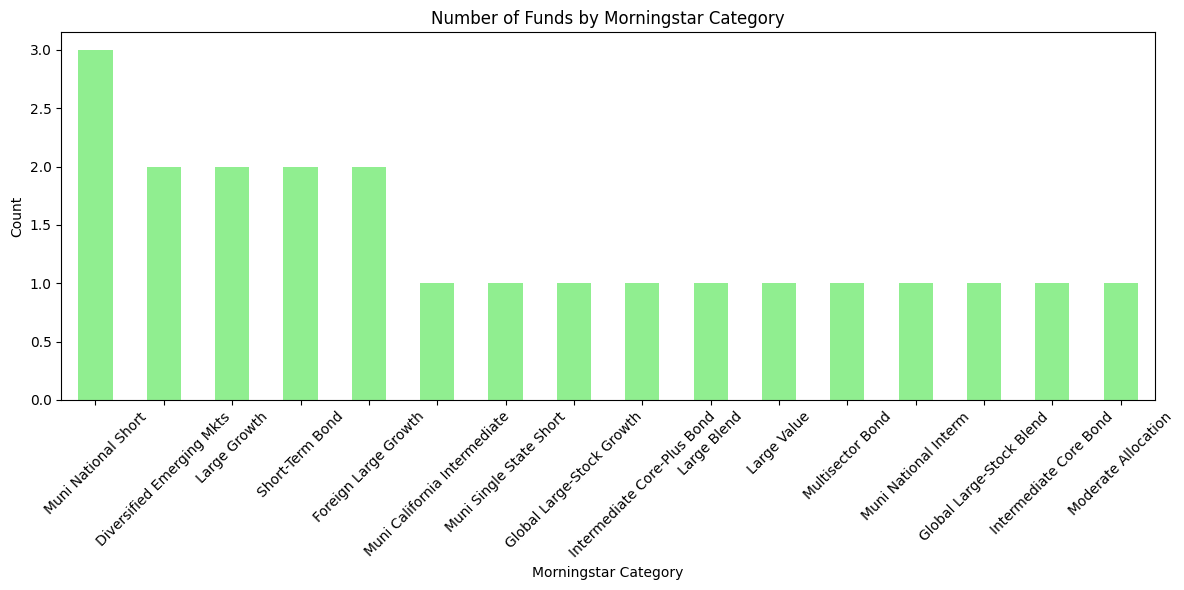

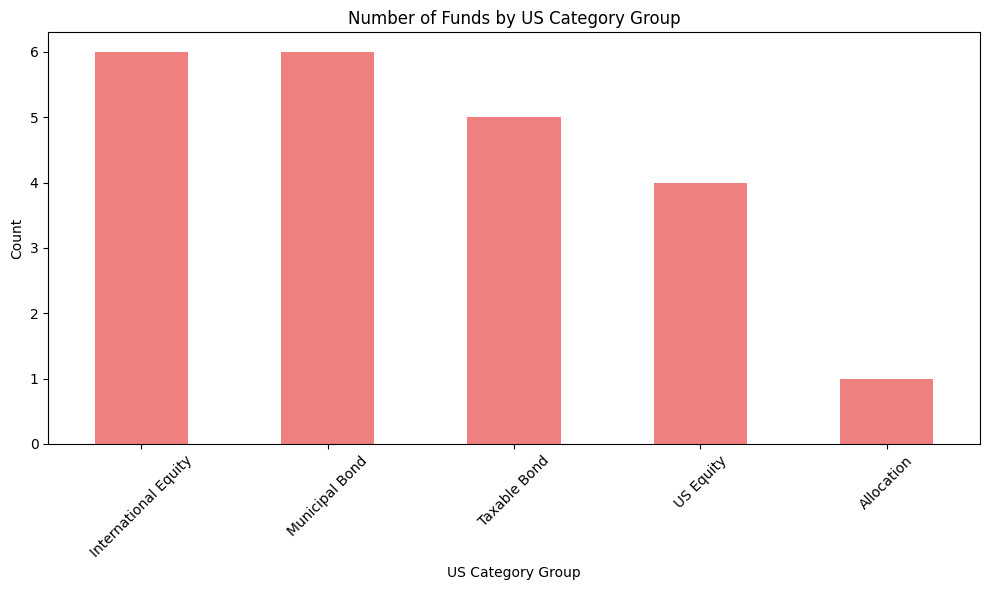

In [132]:
# Count the number of funds by Morningstar category
morningstar_category_counts = CG_funds['Morningstar Category'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
morningstar_category_counts.plot(kind='bar', color='lightgreen')
plt.title('Number of Funds by Morningstar Category')
plt.xlabel('Morningstar Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Count the number of funds by US category group
us_category_counts = CG_funds['US Category Group'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
us_category_counts.plot(kind='bar', color='lightcoral')
plt.title('Number of Funds by US Category Group')
plt.xlabel('US Category Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/m_/hk1ymwn50qb5prsbrm2pp4y80000gn/T/ipykernel_8162/3950707750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CG_funds['Total Net Assets'] = CG_funds[net_assets_columns].sum(axis=1)


<Figure size 1000x600 with 0 Axes>

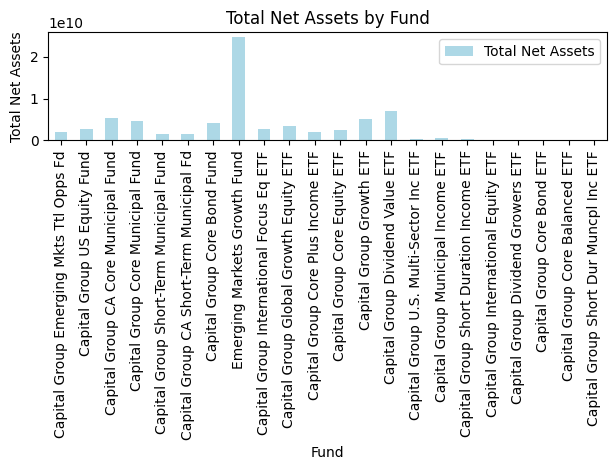

In [135]:
# Calculate the total net assets for each fund
CG_funds['Total Net Assets'] = CG_funds[net_assets_columns].sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
CG_funds.plot(x='Fund', y='Total Net Assets', kind='bar', color='lightblue')
plt.title('Total Net Assets by Fund')
plt.xlabel('Fund')
plt.ylabel('Total Net Assets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
